# * * * * * * * `Project` - `Analyzing Amazon Sales data` * * * * * * *
<br>
<br>

* * * `Amazon.com, Inc.`, doing business as `Amazon`, is an American multinational technology company, engaged in e-commerce, cloud computing, online advertising, digital streaming, and artificial intelligence.
<br>
<br>
* `Founded`: 5 July 1994, Bellevue, Washington, United States
* `Headquarters`: Seattle, Washington, United States
* `Founder`: Jeff Bezos
* `CEO`: Andy Jassy (5 Jul 2021–)
* `Subsidiaries`: Amazon Web Services, MORE
* `President`: Andy Jassy

###  * `Problem Statement` : 

* Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise. Do ETL: Extract-Transform-Load some Amazon dataset and find for me, Sales-trend -> month-wise, year-wise, yearly_month-wise. Find key metrics and factors and show the meaningful relationships between attributes.

### * * * `Data Description` : -

* The given dataset i.e., `'Amazon Sales data.csv'`, which belongs to the company `Amazon` with `E-Commerce` domain while we can use `Data Science` Technology for our solution.
<br>
<br>
* It contains the places, sales, orders, cost, revenue and profit.
<br>
<br>
* It contains `items type` such as --> `Baby Food`, `Cereal`,`Office Supplies`, `Fruits`, `Household`, `Vegetables`, `Personal Care`, `Clothes`, `Cosmetics`, `Beverages`, `Meat` and `Snacks`.
<br>
<br>
* It also contains `demographic features` such as --> `Region`, `Country` and mode of sales --> `Sales Channel` (Online, Offline).
<br>
<br>
* It contains `orders` with different columns such as --> `Order Priority`, `Order Date`, `Order ID` and `Ship Date`. `Order Priority` such as --> `H`, `C`, `L`, `M`.
<br>
<br>
* The sales of items with --> `units sold`, `unit price`, `unit cost`, `total cost`, `total revenue` and `total profit`.

### * * * * * `Objective of the Project` : -

* This analysis aims to gain insights and understanding from the provided dataset, particularly focusing on the relationship between various features.
<br>
* Specifically, the goals of this analysis include:
<br>
• Describing the dataset and its features comprehensively.
<br>
• Identifying any patterns or trends present in the data.
<br>
• Sales-trend --> month-wise, year-wise, yearly_month-wise
<br>
• Exploring the relationships between attributes.

In [1]:
### Load the required libraries
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Amazon Sales data.csv')

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
df = df[["Order ID","Order Date","Order Priority","Ship Date","Item Type","Region","Country","Sales Channel","Units Sold","Unit Price","Unit Cost","Total Revenue","Total Cost","Total Profit"]]

In [5]:
df.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,669165933,5/28/2010,H,6/27/2010,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,963881480,8/22/2012,C,9/15/2012,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36
2,341417157,05-02-2014,L,05-08-2014,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,514321792,6/20/2014,C,07-05-2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82
4,115456712,02-01-2013,L,02-06-2013,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [6]:
df.shape

(100, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        100 non-null    int64  
 1   Order Date      100 non-null    object 
 2   Order Priority  100 non-null    object 
 3   Ship Date       100 non-null    object 
 4   Item Type       100 non-null    object 
 5   Region          100 non-null    object 
 6   Country         100 non-null    object 
 7   Sales Channel   100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


Now, we observe each feature of the dataset:

1. `Region`: It describes the geographic location where sales occured.
2. `Country`: It describes the country of that geographic location.
3. `Item type`: This shows the variety of item category.
4. `Sales Channel`: It indicates the medium or platform through which sales transactions are conducted.
5. `Order priority`: It indicates the urgency level assigned to fulfilling an order, such as high, medium, low, or critical.
6. `Order Date`: It shows the date on which order was placed.
7. `Order Id`: It is a unique identifier assigned to each sales transaction, ensuring each order can be distinctly tracked and referenced.
8. `Ship date`: It indicates the date on which order was shipped to the customer.
9. `Units Sold`: It signifies the quantity of items sold per transaction.
10. `Unit Price`: It Indicates the price of each item in the specified item type per unit
11. `Unit Cost`: The amount it costs Amazon to get or make each item.
12. `Total Revenue`: The total amount of money earned from sales before any expenses are deducted.
13. `Total Cost`: The overall expense incurred by Amazon, encompassing all costs associated with acquiring, producing, and delivering products sold, including operational expenses.
14. `Total Profit`: The amount earned from selling an item after subtracting all expenses associated with acquiring, producing, and delivering it.

In [8]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [9]:
df.nunique()

Order ID          100
Order Date        100
Order Priority      4
Ship Date          99
Item Type          12
Region              7
Country            76
Sales Channel       2
Units Sold         99
Unit Price         12
Unit Cost          12
Total Revenue     100
Total Cost        100
Total Profit      100
dtype: int64

In [10]:
df.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Ship Date', 'Item Type',
       'Region', 'Country', 'Sales Channel', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

* * * `Total Sales` : Total sales is defined as, the total revenue generated from selling goods or services. It is calculated by multiplying the number of units sold by the unit price of each unit. In other words, if you sell a certain number of items (units sold) at a specific price (unit price), the total amount of money received from those sales is the total sales. It’s a measure of the overall financial performance in terms of sales for a given period.

In [11]:
df['Total Sales'] = df['Units Sold']*df['Unit Price']

In [12]:
df.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales
0,669165933,5/28/2010,H,6/27/2010,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2533654.00
1,963881480,8/22/2012,C,9/15/2012,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36,576782.80
2,341417157,05-02-2014,L,05-08-2014,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75,1158502.59
3,514321792,6/20/2014,C,07-05-2014,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66
4,115456712,02-01-2013,L,02-06-2013,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50,3296425.02


# <<< Sales Trend using Order date >>>

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [14]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [15]:
df.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month
0,669165933,2010-05-28,H,2010-06-27,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2533654.00,2010,5
1,963881480,2012-08-22,C,2012-09-15,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36,576782.80,2012,8
2,341417157,2014-05-02,L,2014-05-08,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75,1158502.59,2014,5
3,514321792,2014-06-20,C,2014-07-05,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,2014,6
4,115456712,2013-02-01,L,2013-02-06,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50,3296425.02,2013,2


## <<<< Year-wise Sales Trends >>>>

In [16]:
yearly_sales = df.groupby('Year')['Total Sales'].sum()

In [17]:
yearly_sales

Year
2010    19186024.92
2011    11129166.07
2012    31898644.52
2013    20330448.66
2014    16630214.43
2015    12427982.86
2016    12372867.22
2017    13373419.63
Name: Total Sales, dtype: float64

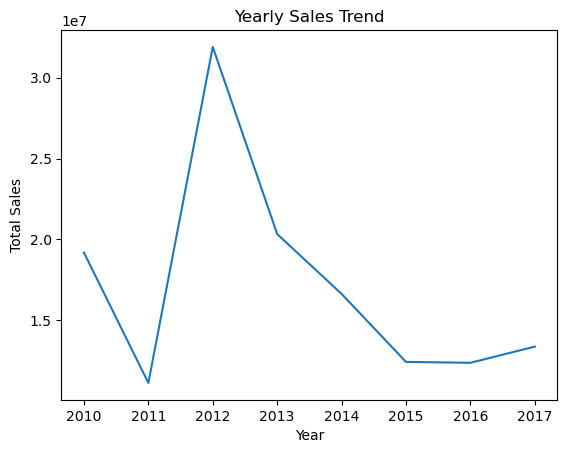

In [18]:
plt.plot(yearly_sales.index, yearly_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend')
plt.show()

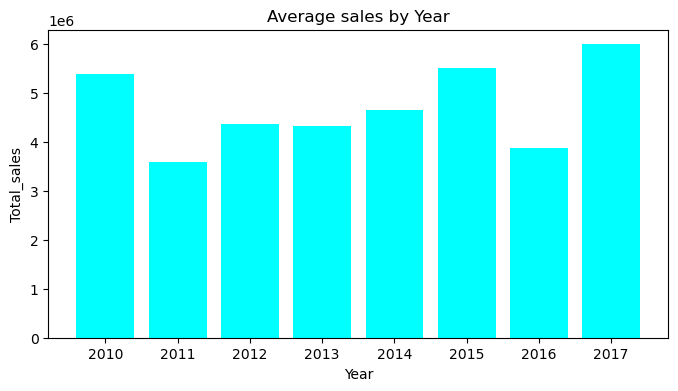

In [19]:
plt.figure(figsize=(8,4))
ax = plt.bar(df['Year'], df['Total Sales'], color='Aqua')
plt.title('Average sales by Year')
plt.xlabel('Year')
plt.ylabel('Total_sales')
plt.show()

## <<<< Month-wise Sales Trends >>>>

In [20]:
monthly_sales = df.groupby('Month')['Total Sales'].sum()

In [21]:
monthly_sales

Month
1     10482467.12
2     24740517.77
3      2274823.87
4     16187186.33
5     13215739.99
6      5230325.77
7     15669518.50
8      1128164.91
9      5314762.56
10    15287576.61
11    20568222.76
12     7249462.12
Name: Total Sales, dtype: float64

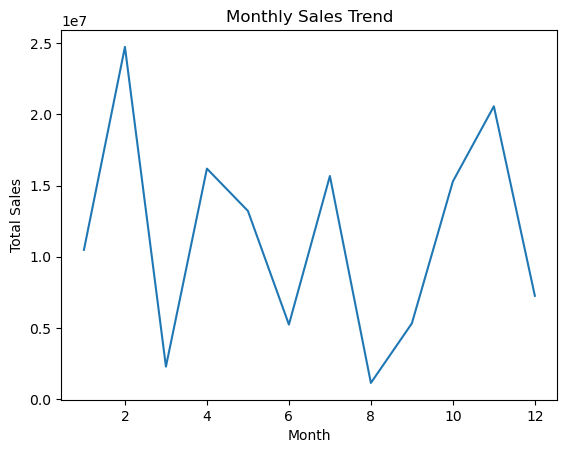

In [22]:
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.show()

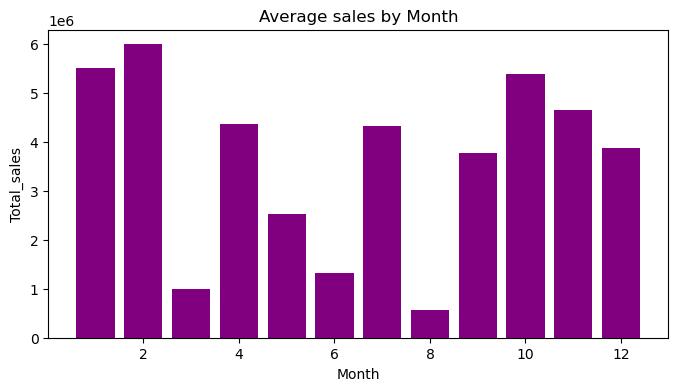

In [23]:
plt.figure(figsize=(8,4))
ax = plt.bar(df['Month'], df['Total Sales'], color='Purple')
plt.title('Average sales by Month')
plt.xlabel('Month')
plt.ylabel('Total_sales')
plt.show()

## <<<< Yearly_month-wise Sales Trends >>>>

In [24]:
yearly_month_sales = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

In [25]:
yearly_month_sales

,Year,Month,Total Sales
0,2010,2,3410661.12
1,2010,5,2587973.26
2,2010,6,1082418.40
3,2010,10,6064933.75
4,2010,11,3458252.00
5,2010,12,2581786.39
6,2011,1,1042225.35
7,2011,2,387002.20
8,2011,4,2798046.49
9,2011,5,272410.45


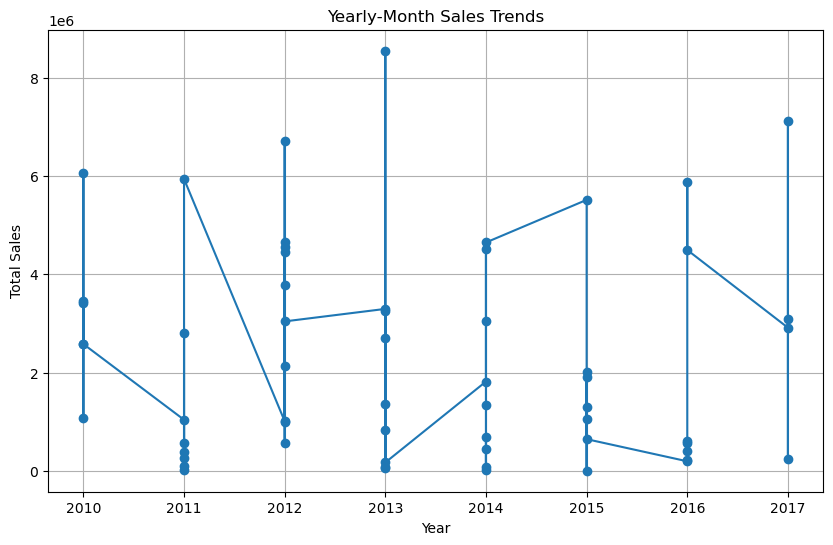

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_month_sales['Year'], yearly_month_sales['Total Sales'], marker='o')
plt.title('Yearly-Month Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

### * * * Over past 7 years from 2010 to 2017, Total sales had showed the positive trend. It is important to note that this graph only shows data for eight years, so it is difficult to say for sure whether this upward trend will continue.

* Different way :

In [27]:
sales_by_month = df.groupby(['Year', 'Month'])['Total Sales'].sum().unstack()

In [28]:
sales_by_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,3410661.12,NaN,NaN,2587973.26,1082418.40,NaN,NaN,NaN,6064933.75,3458252.00,2581786.39
2011,1042225.35,387002.20,NaN,2798046.49,272410.45,19103.44,97040.64,NaN,574951.92,NaN,5938385.58,NaN
2012,1012884.00,6707849.42,994765.42,4556012.38,3782781.82,2132075.27,4445093.92,576782.80,4648152.72,3042246.77,NaN,NaN
2013,NaN,3296425.02,835759.10,3262562.10,NaN,1352867.40,8545511.20,89623.98,71253.21,2702770.40,NaN,173676.25
2014,NaN,1819660.25,NaN,4510578.10,3060338.59,75591.66,688641.85,455479.04,20404.71,1352370.65,4647149.58,NaN
2015,5513227.50,2003911.12,NaN,1059987.26,NaN,NaN,1292409.45,6279.09,NaN,1904138.04,648030.40,NaN
2016,NaN,NaN,197883.40,NaN,414371.10,568269.60,600821.44,NaN,NaN,221117.00,5876405.20,4493999.48
2017,2914130.27,7115008.64,246415.95,NaN,3097864.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN


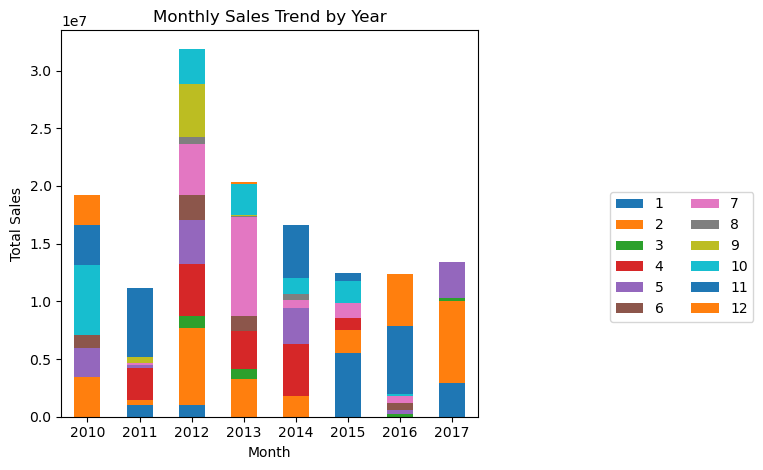

In [29]:
sales_by_month.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.3, 0.6), ncol=2)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend by Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### >>> Let's dive into depth of data

In [30]:
region_wise_profit = df.groupby(['Region', 'Sales Channel'])['Total Profit'].sum().reset_index()

region_wise_profit

,Region,Sales Channel,Total Profit
0,Asia,Offline,3584286.33
1,Asia,Online,2529559.54
2,Australia and Oceania,Offline,1886283.82
3,Australia and Oceania,Online,2835876.21
4,Central America and the Caribbean,Offline,2475814.99
5,Central America and the Caribbean,Online,371092.86
6,Europe,Offline,5574539.91
7,Europe,Online,5508398.72
8,Middle East and North Africa,Offline,2169081.08
9,Middle East and North Africa,Online,3592110.78


### * * * Asia, Central America and the Caribbean, Europe, Sub-Saharan Africa has generated more profit in offline mode whereas Australia and Oceania, Middle East and North Africa had more profit in online mode. North America has only offline option.

In [31]:
item_type = df.groupby(df['Item Type'])['Total Sales'].sum().reset_index()

item_type

,Item Type,Total Sales
0,Baby Food,10350327.60
1,Beverages,2690794.60
2,Cereal,5322898.90
3,Clothes,7787292.80
4,Cosmetics,36601509.60
5,Fruits,466481.34
6,Household,29889712.29
7,Meat,4503675.75
8,Office Supplies,30585380.07
9,Personal Care,3980904.84


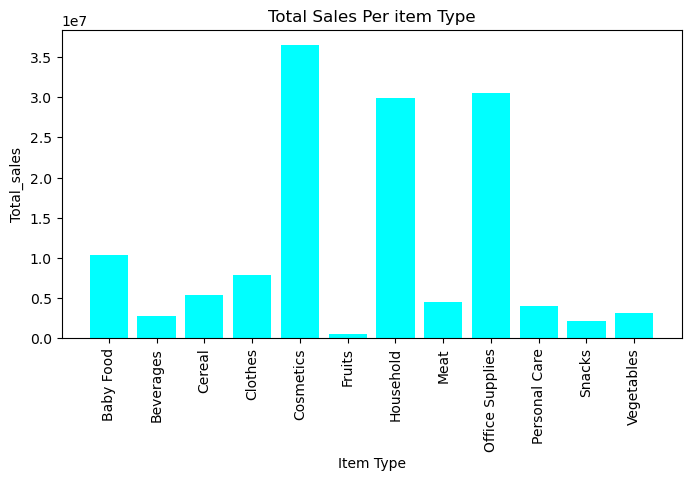

In [32]:
plt.figure(figsize=(8,4))
plt.bar(item_type['Item Type'], item_type['Total Sales'], color='aqua')
plt.title('Total Sales Per item Type')
plt.xlabel('Item Type')
plt.ylabel('Total_sales')
plt.xticks(rotation=90)
plt.show()

### * * * Cosmetics are the top seller item type as per data whereas Fruits are underperforming.

### >>> Identifyng top 10 customers

In [33]:
# Sort the DataFrame by 'Total Sales' in descending order
sorted_df = df.sort_values(by='Total Sales', ascending=False)

# Group by 'Order ID' and sum the 'Total Sales' for each customer
top_customers = df.groupby('Order ID')['Total Sales'].sum().reset_index()

# Sort the top customers by 'Total Sales' in descending order
top_customers = top_customers.sort_values(by='Total Sales', ascending=False)

# Display the top 10 customers
top_customers.head(10)

,Order ID,Total Sales
47,522840487,5997054.98
9,177713572,5513227.50
7,166460740,5396577.27
98,986435210,4647149.58
22,320009267,4368316.68
17,231145322,4324782.40
62,670854651,4220728.80
24,331438481,3876652.40
19,249693334,3786589.20
8,177636754,3593376.78


In [34]:
df.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month
0,669165933,2010-05-28,H,2010-06-27,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2533654.00,2010,5
1,963881480,2012-08-22,C,2012-09-15,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,576782.80,328376.44,248406.36,576782.80,2012,8
2,341417157,2014-05-02,L,2014-05-08,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,1158502.59,933903.84,224598.75,1158502.59,2014,5
3,514321792,2014-06-20,C,2014-07-05,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,2014,6
4,115456712,2013-02-01,L,2013-02-06,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,3296425.02,2657347.52,639077.50,3296425.02,2013,2


In [35]:
df.groupby(df['Region'])['Order ID'].count().reset_index()

,Region,Order ID
0,Asia,11
1,Australia and Oceania,11
2,Central America and the Caribbean,7
3,Europe,22
4,Middle East and North Africa,10
5,North America,3
6,Sub-Saharan Africa,36


### * * * 'Sub-Saharan Africa' and 'Europe' has the highest number of customers i.e. 36 & 22, and 'North America' as least number of customer i.e. 3

### >>>  Top 5 countries having maximum customers

In [36]:
df1 = df.groupby(df['Country'])['Order ID'].count().reset_index()

max_customers = df1.sort_values(by='Order ID', ascending=False)

max_customers.head(5)

,Country,Order ID
71,The Gambia,4
41,Mexico,3
2,Australia,3
59,Sao Tome and Principe,3
62,Sierra Leone,3


### * * * The Gambia, Maxico, Australia, SaoTome and Principe, Sierra Leone are the top 5 countries having maximum customers as per given dataset.

In [37]:
df.loc[:,["Total Revenue","Total Profit"]].iloc[:]

,Total Revenue,Total Profit
0,2533654.00,951410.50
1,576782.80,248406.36
2,1158502.59,224598.75
3,75591.66,19525.82
4,3296425.02,639077.50
...,...,...
95,97040.64,65214.72
96,58471.11,15103.47
97,228779.10,93748.05
98,471336.91,144521.02


In [38]:
np.corrcoef(df.loc[:,'Total Revenue'].iloc[:],df.loc[:,'Total Profit'].iloc[:])

array([[1.        , 0.89732687],
       [0.89732687, 1.        ]])

In [39]:
df.cov()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month
Order ID,6.792031e+16,-1.623398e+11,-1.172359e+10,-1.045747e+10,-1.197405e+14,-9.292378e+13,-2.681668e+13,-1.197405e+14,4.449147e+07,-9.719791e+07
Units Sold,-1.623398e+11,7.809144e+06,-4.640481e+04,-4.850918e+04,1.826973e+09,1.135124e+09,6.918495e+08,1.826973e+09,7.268354e+01,-7.492384e+01
Unit Price,-1.172359e+10,-4.640481e+04,5.550370e+04,4.377593e+04,2.587902e+08,2.012054e+08,5.758482e+07,2.587902e+08,-3.039949e+01,-2.521499e+01
Unit Cost,-1.045747e+10,-4.850918e+04,4.377593e+04,3.542232e+04,1.966455e+08,1.580833e+08,3.856216e+07,1.966455e+08,-2.812741e+01,-2.651735e+01
Total Revenue,-1.197405e+14,1.826973e+09,2.587902e+08,1.966455e+08,2.131684e+12,1.557145e+12,5.745386e+11,2.131684e+12,-1.132001e+05,1.877433e+04
Total Cost,-9.292378e+13,1.135124e+09,2.012054e+08,1.580833e+08,1.557145e+12,1.174922e+12,3.822231e+11,1.557145e+12,-1.152107e+05,-5.676315e+04
Total Profit,-2.681668e+13,6.918495e+08,5.758482e+07,3.856216e+07,5.745386e+11,3.822231e+11,1.923155e+11,5.745386e+11,2.010645e+03,7.553748e+04
Total Sales,-1.197405e+14,1.826973e+09,2.587902e+08,1.966455e+08,2.131684e+12,1.557145e+12,5.745386e+11,2.131684e+12,-1.132001e+05,1.877433e+04
Year,4.449147e+07,7.268354e+01,-3.039949e+01,-2.812741e+01,-1.132001e+05,-1.152107e+05,2.010645e+03,-1.132001e+05,4.360707e+00,-7.472727e-01
Month,-9.719791e+07,-7.492384e+01,-2.521499e+01,-2.651735e+01,1.877433e+04,-5.676315e+04,7.553748e+04,1.877433e+04,-7.472727e-01,1.124485e+01


In [40]:
df.corr(method='pearson')

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month
Order ID,1.000000,-0.222907,-0.190941,-0.213201,-0.314688,-0.328944,-0.234638,-0.314688,0.081752,-0.111219
Units Sold,-0.222907,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550,0.447784,0.012455,-0.007995
Unit Price,-0.190941,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365,0.752360,-0.061791,-0.031917
Unit Cost,-0.213201,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214,0.715623,-0.071567,-0.042016
Total Revenue,-0.314688,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327,1.000000,-0.037128,0.003835
Total Cost,-0.328944,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091,0.983928,-0.050899,-0.015617
Total Profit,-0.234638,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000,0.897327,0.002196,0.051366
Total Sales,-0.314688,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327,1.000000,-0.037128,0.003835
Year,0.081752,0.012455,-0.061791,-0.071567,-0.037128,-0.050899,0.002196,-0.037128,1.000000,-0.106715
Month,-0.111219,-0.007995,-0.031917,-0.042016,0.003835,-0.015617,0.051366,0.003835,-0.106715,1.000000


#### * The high value of Pearson correlation coefficient between Total Revenue and Total Profit indicates that these two variables are closely related to each other.

#### * If revenue generated is high, then more profit will be generated and vice versa.

#### * The negative value of correlation coefficient among Units Sold and Unit Cost implies that quantity of products is inversely proportional to their cost. Same is the scenario with Units Sold and Units Price. Lesser the number of units of a product available, more will be it's price.

## >>> Let's check Profit

In [41]:
np.average(df['Total Profit'])

441681.98399999994

### *** At an average, the profit generated for a product is ₹441681.98/-

In [42]:
np.max(df['Total Profit'])

1719922.04

In [43]:
np.min(df['Total Profit'])

1258.02

In [44]:
np.var(df['Total Profit'])

190392340968.9648

### *** Maximum and minimum profit generated are ₹1719922.04/- and ₹1258.09/- respectively.

## >>> Let's take a look about Revenue

In [45]:
np.max(df['Total Revenue'])

5997054.98

In [46]:
np.min(df['Total Revenue'])

4870.26

In [47]:
np.mean(df['Total Revenue'])

1373487.6830999998

In [48]:
np.median(df['Total Revenue'])

752314.36

In [49]:
np.std(df['Total Revenue'])

1452710.2211044075

In [50]:
np.var(df['Total Revenue'])

2110366986501.2166

In [51]:
np.percentile(df['Total Revenue'],50,axis=0,overwrite_input=True)

752314.36

### *** Maximum and minimum revenue generated by the product are ₹5997054.98 and ₹4870.26/-

### *** Revenue has very high variability in it's distribution. The median revenue generated is ₹752314.36/-

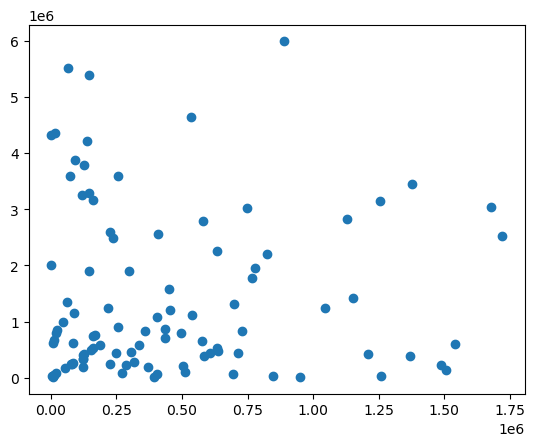

In [52]:
plt.scatter(df['Total Profit'],df['Total Revenue'])

### *** The scatter plot also suggests that total profit and total revenue are directly proportional to each other.

(array([44., 18.,  8.,  6.,  6.,  9.,  2.,  4.,  1.,  2.]),
 array([4.87026000e+03, 6.04088732e+05, 1.20330720e+06, 1.80252568e+06,
        2.40174415e+06, 3.00096262e+06, 3.60018109e+06, 4.19939956e+06,
        4.79861804e+06, 5.39783651e+06, 5.99705498e+06]),
 <BarContainer object of 10 artists>)

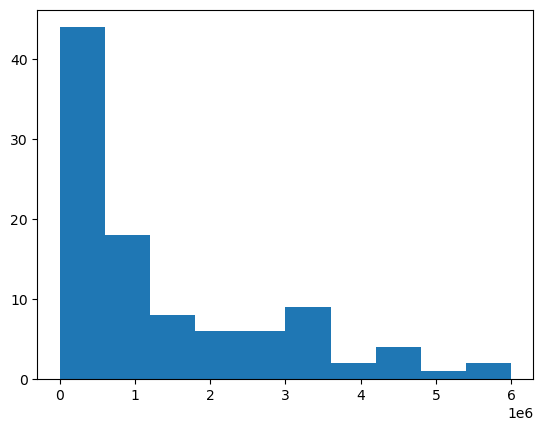

In [53]:
plt.hist(df['Total Revenue'])

In [54]:
np.correlate(df['Total Revenue'],df['Total Profit'])

array([6.25562019e+13])

In [55]:
df.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month
0,669165933,2010-05-28,H,2010-06-27,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,4870.26,1582243.50,951410.50,2533654.00,2010,5
1,963881480,2012-08-22,C,2012-09-15,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,435466.90,328376.44,248406.36,576782.80,2012,8
2,341417157,2014-05-02,L,2014-05-08,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,247956.32,933903.84,224598.75,1158502.59,2014,5
3,514321792,2014-06-20,C,2014-07-05,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,2014,6
4,115456712,2013-02-01,L,2013-02-06,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,471336.91,2657347.52,639077.50,3296425.02,2013,2


In [56]:
np.histogram(df['Total Cost'],bins=10)

(array([53, 13,  6,  5,  9,  8,  1,  2,  0,  3], dtype=int64),
 array([3.61224000e+03, 4.54230412e+05, 9.04848584e+05, 1.35546676e+06,
        1.80608493e+06, 2.25670310e+06, 2.70732127e+06, 3.15793944e+06,
        3.60855762e+06, 4.05917579e+06, 4.50979396e+06]))

(array([33., 20.,  7.,  6.,  3.,  3.,  2.,  3.,  5.,  4.,  3.,  5.,  1.,
         0.,  0.,  2.,  0.,  0.,  1.,  2.]),
 array([3.61224000e+03, 2.28921326e+05, 4.54230412e+05, 6.79539498e+05,
        9.04848584e+05, 1.13015767e+06, 1.35546676e+06, 1.58077584e+06,
        1.80608493e+06, 2.03139401e+06, 2.25670310e+06, 2.48201219e+06,
        2.70732127e+06, 2.93263036e+06, 3.15793944e+06, 3.38324853e+06,
        3.60855762e+06, 3.83386670e+06, 4.05917579e+06, 4.28448487e+06,
        4.50979396e+06]),
 <BarContainer object of 20 artists>)

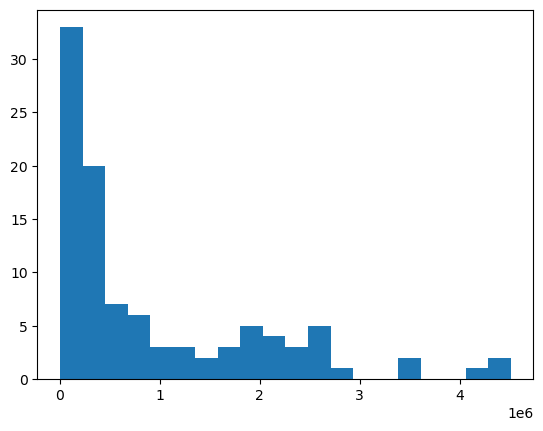

In [57]:
plt.hist(df['Total Cost'],bins=20)

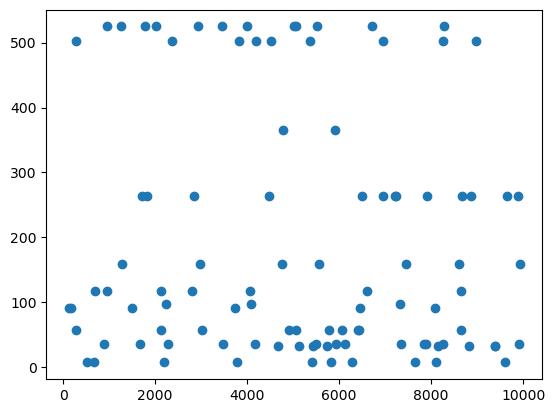

In [58]:
plt.scatter(df['Units Sold'],df['Unit Cost'])

### *** The above scatter plot implies that the two variables 'Units Sold' and 'Unit Cost' are inversely proportional to each other to some extent. When more units of a product are sold, the unit cost of that product becomes lesser and vice versa.

array([<AxesSubplot:xlabel='Units Sold'>], dtype=object)

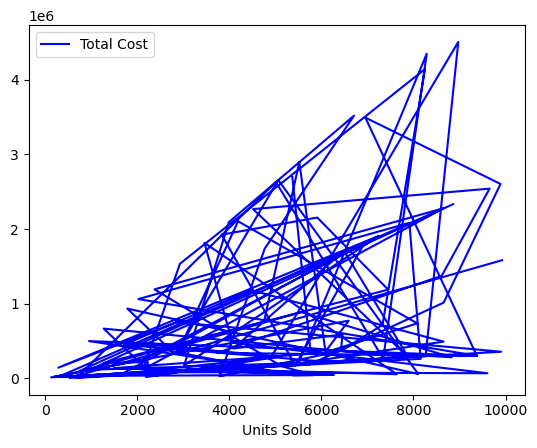

In [59]:
df.plot.line(x='Units Sold',y='Total Cost',subplots=True,color={'Total Cost': 'blue'})

(array([41.,  9., 14.,  0., 13.,  0.,  2.,  0.,  0., 21.]),
 array([  6.92 ,  58.724, 110.528, 162.332, 214.136, 265.94 , 317.744,
        369.548, 421.352, 473.156, 524.96 ]),
 <BarContainer object of 10 artists>)

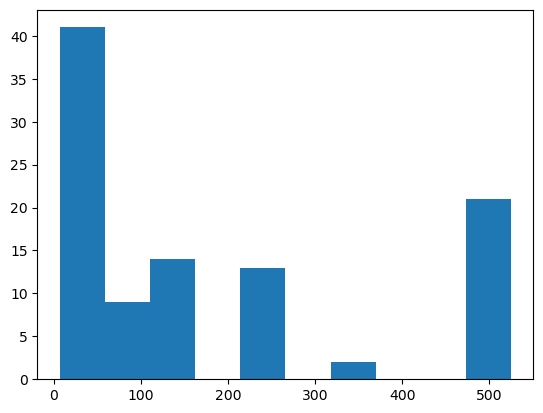

In [60]:
plt.hist(df['Unit Cost'])

In [61]:
np.max(df['Unit Cost'])

524.96

In [62]:
np.min(df['Unit Cost'])

6.92

In [63]:
np.mean(df['Unit Cost'])

191.04800000000006

In [64]:
np.median(df['Unit Cost'])

107.275

In [65]:
np.std(df['Unit Cost'])

187.2647759029979

In [66]:
np.var(df['Unit Cost'])

35068.096294000024

### *** Maximum and minimum unit costs are ₹ 6.92/- and ₹ 524.96/- respectively. Average unit cost of a product is ₹ 191.05/- . The Unit Cost variable varies considerably throughout it's distribution. The median cost of a unit stands at ₹ 107.28/- .

Text(0, 0.5, 'Total Profit')

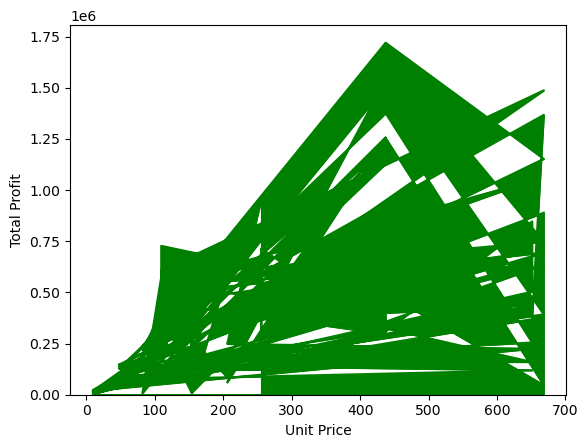

In [67]:
area_plot = df.plot.area(x='Unit Price',y='Total Profit',color='green',stacked=True,legend=None)
plt.ylabel('Total Profit')

### *** Maximum profit has been generated in the unit price range of ₹400/-  to  ₹500/- .

Text(0, 0.5, 'Total Profit')

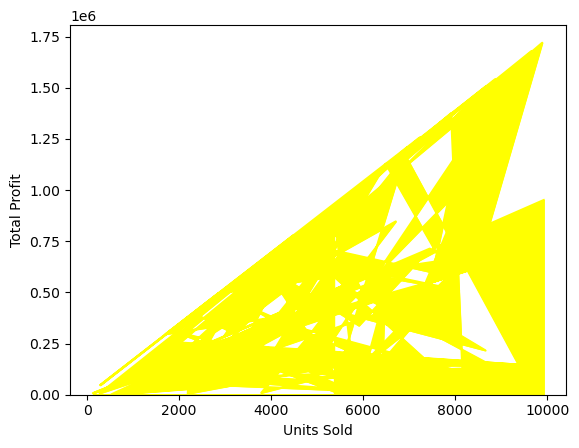

In [68]:
df.plot.area(x='Units Sold',y='Total Profit',color='yellow',legend=None)
plt.ylabel('Total Profit')

### *** Maximum profit has been generated when the number of units sold were between 8000 and 10000 i.e. more the number of units sold, more will be the profit generated.

Text(0, 0.5, 'Total Cost')

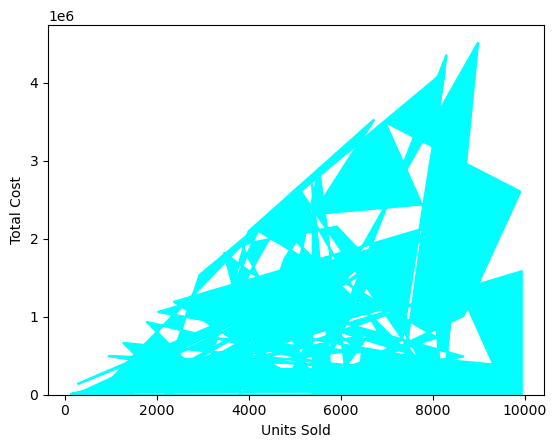

In [69]:
df.plot.area(x='Units Sold',y='Total Cost',color='aqua',legend=None)
plt.ylabel('Total Cost')

### *** Maximum cost has been generated when 8000-9000 units were sold.

Text(0, 0.5, 'Total Revenue')

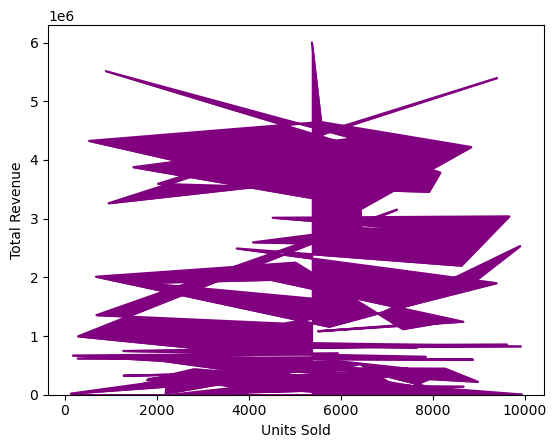

In [70]:
df.plot.area(x='Units Sold',y='Total Revenue',color='purple',legend=None)
plt.ylabel('Total Revenue')

### *** Maximum revenue has been generated when 5000-6500 units of a product were sold.

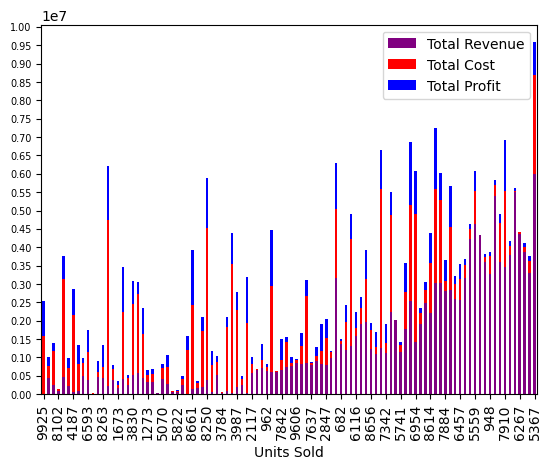

In [71]:
bar_plot = df.plot.bar(x='Units Sold',y=['Total Revenue','Total Cost','Total Profit'],color=['purple','red','blue'],stacked=True,rot=True)
plt.xticks(rotation=90)
plt.locator_params(nbins=38)
plt.tick_params(axis='y', which='major', labelsize=7)

Text(0.5, 0, 'Total Revenue')

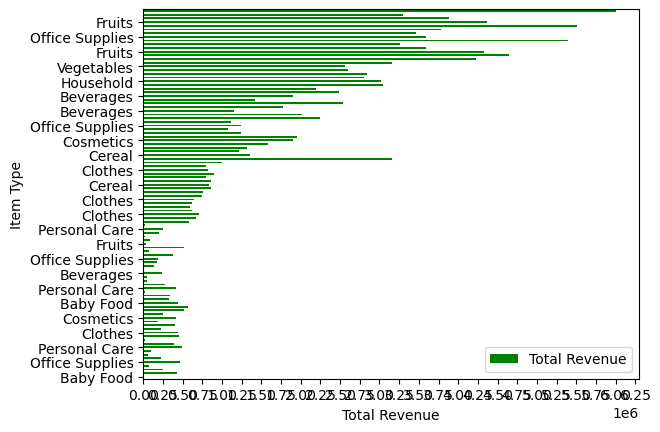

In [72]:
df.plot.barh(x='Item Type',y='Total Revenue',color='green')
plt.locator_params(nbins=28)
plt.xlabel('Total Revenue')

In [73]:
df['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [74]:
items = ['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks']

In [75]:
df['Item Type'] = pd.Categorical(df['Item Type'],categories=items,ordered=True)

<AxesSubplot:xlabel='Item Type'>

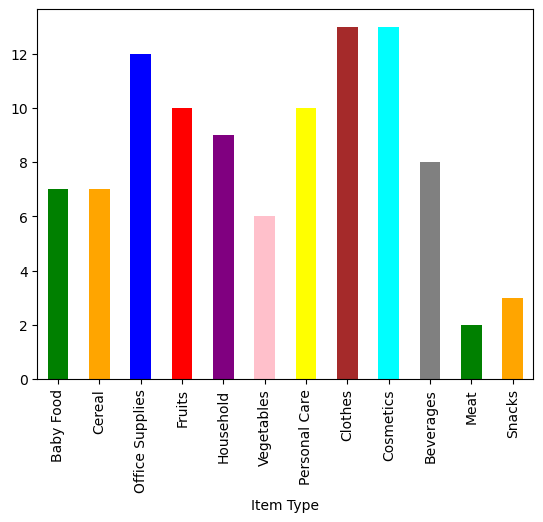

In [76]:
df.groupby('Item Type')['Total Revenue'].count().plot(kind='bar',color=['green','orange','blue','red','purple','pink','yellow','brown','aqua','grey'])

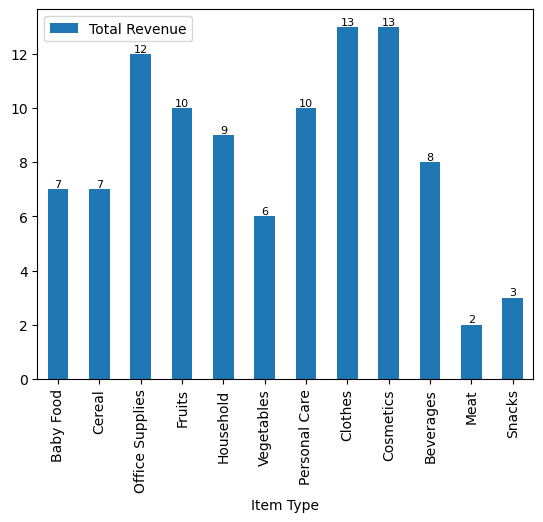

In [77]:
ax = pd.pivot_table(df,values='Total Revenue',index='Item Type',aggfunc='count').plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

### *** Maximum revenue has been generated from the items 'Clothes' and 'Cosmetics' closely followed by 'Office Supplies'.

Text(0.5, 0, 'Units Sold')

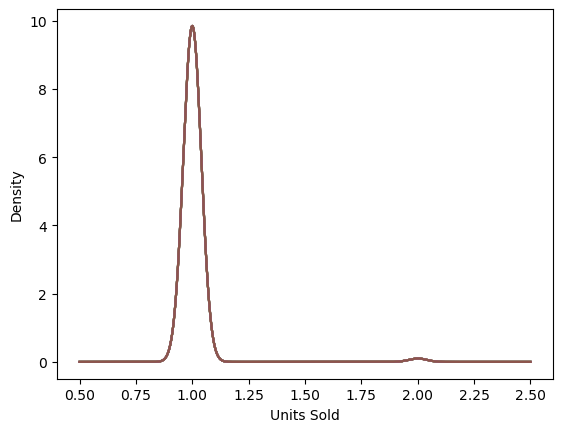

In [78]:
#pd.pivot_table(sales_data,values=['Total Revenue','Total Cost','Total Profit'],index='Units Sold',aggfunc='count').plot(kind='kde',color=['green','orange','red'],stacked=True)
pd.pivot_table(df,index='Units Sold',aggfunc='count').plot(kind='kde',stacked=True,legend=None)
plt.xlabel('Units Sold')

In [79]:
df.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month
0,669165933,2010-05-28,H,2010-06-27,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,4870.26,1582243.50,951410.50,2533654.00,2010,5
1,963881480,2012-08-22,C,2012-09-15,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,435466.90,328376.44,248406.36,576782.80,2012,8
2,341417157,2014-05-02,L,2014-05-08,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,247956.32,933903.84,224598.75,1158502.59,2014,5
3,514321792,2014-06-20,C,2014-07-05,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,2014,6
4,115456712,2013-02-01,L,2013-02-06,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,471336.91,2657347.52,639077.50,3296425.02,2013,2


In [80]:
df.loc[:,'Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

Text(0.5, 0, 'Order Date')

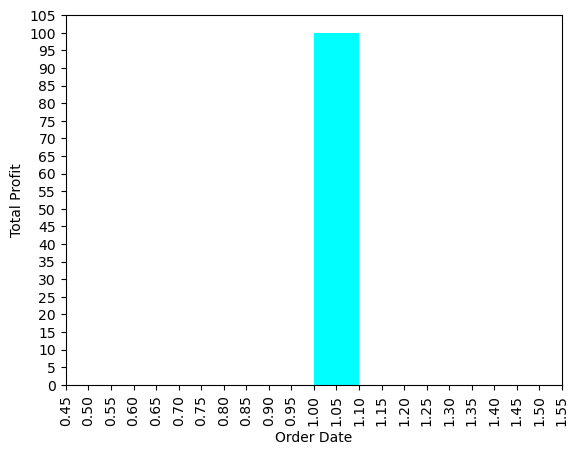

In [81]:
pd.pivot_table(df,values='Total Profit',index='Order Date',aggfunc='count').plot(kind='hist',color='aqua',stacked=False,legend=None)
plt.xticks(rotation=90)
plt.ylabel('Total Profit')
plt.locator_params(nbins=32)
plt.xlabel('Order Date')

In [82]:
df['Region'].unique()

array(['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America'], dtype=object)

In [83]:
regions = ['Australia and Oceania', 'Central America and the Caribbean',
       'Europe', 'Sub-Saharan Africa', 'Asia',
       'Middle East and North Africa', 'North America']

In [84]:
df['Region'] = pd.Categorical(df['Region'],categories = regions,ordered=True)

Text(0, 0.5, 'Total Cost')

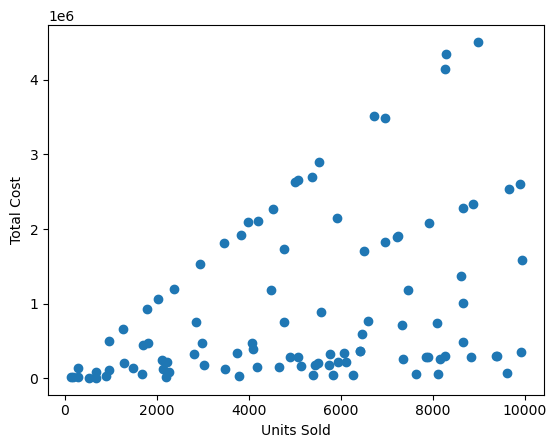

In [85]:
plt.scatter(df['Units Sold'],df['Total Cost'])
plt.xlabel('Units Sold')
plt.ylabel('Total Cost')

### *** More the number of units sold of a product, more will be the total cost associated with it.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Australia and Oceania'),
  Text(1, 0, 'Central America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Asia'),
  Text(5, 0, 'Middle East and North Africa'),
  Text(6, 0, 'North America')])

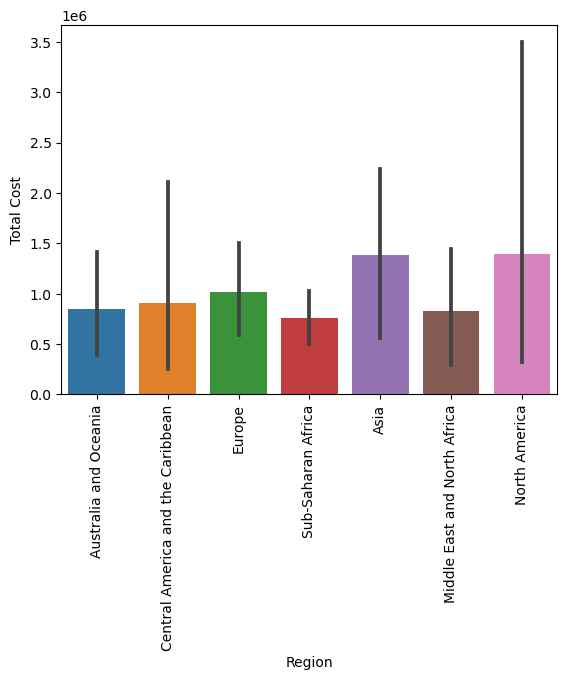

In [86]:
sns.barplot(x='Region',y='Total Cost',data=df)
plt.xticks(rotation=90)

### *** Cost of items is maximum in Asia and North America, and minimum in Sub-Saharan Africa.

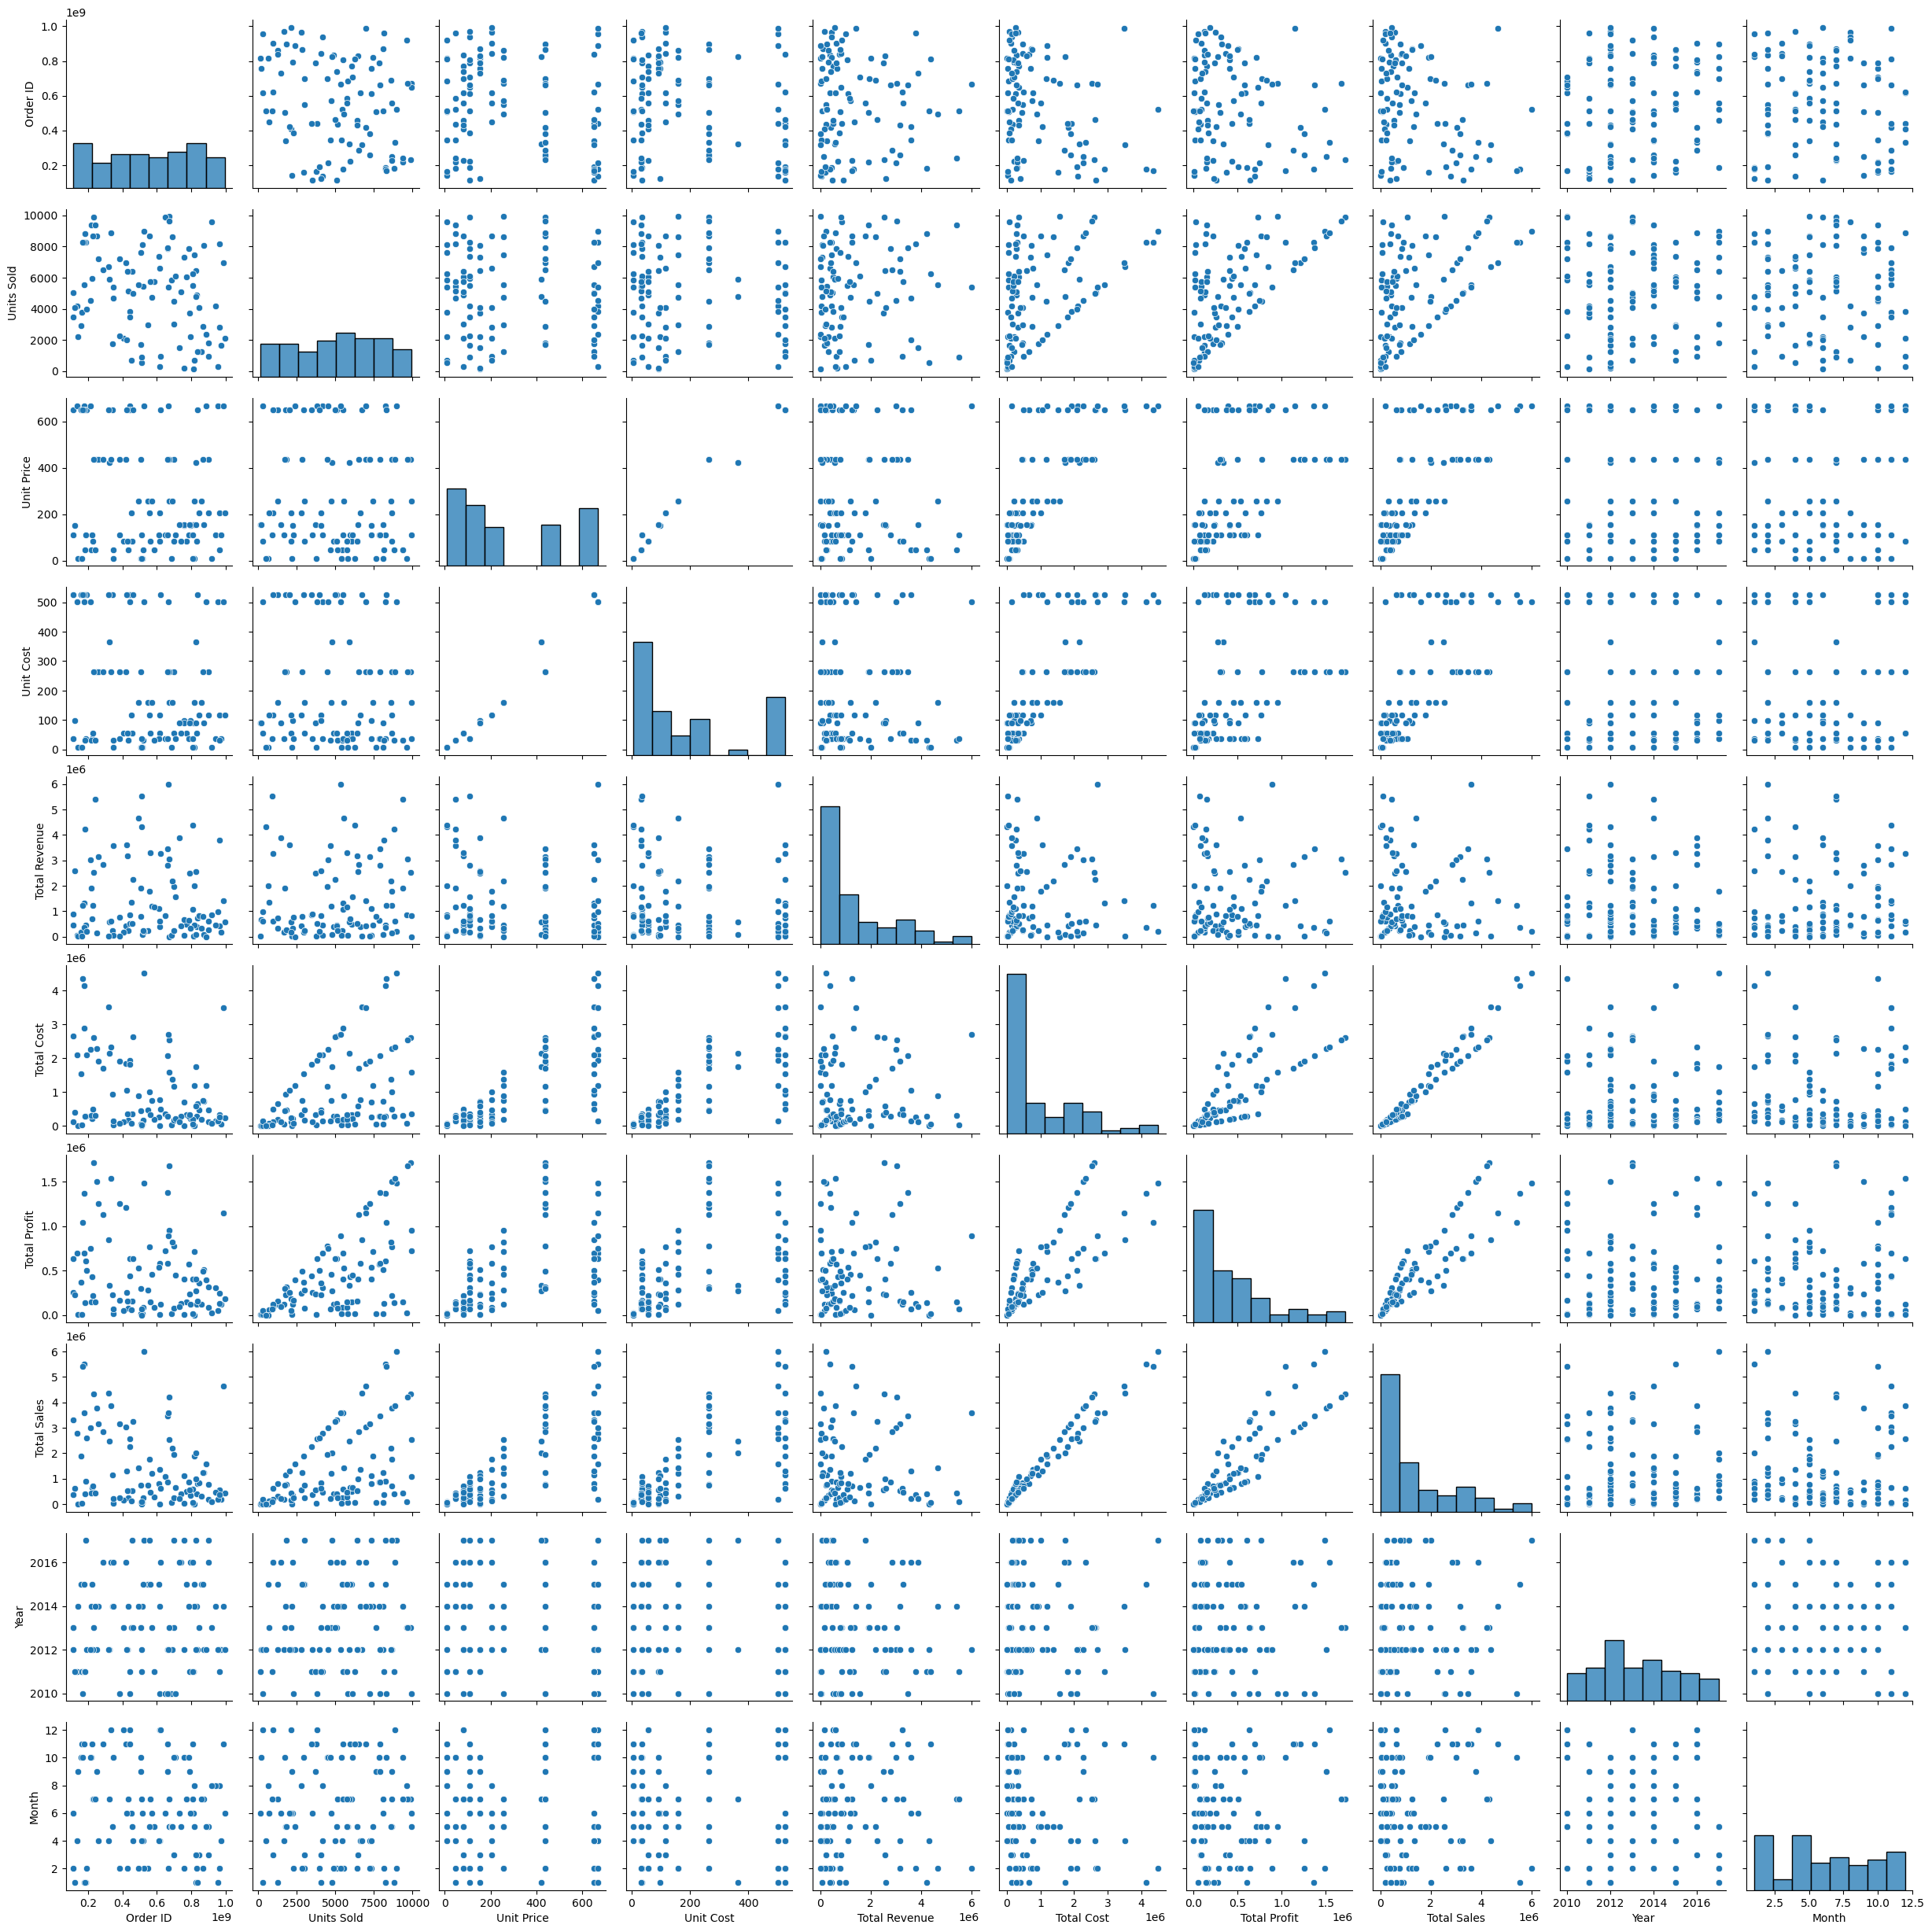

In [87]:
sns.pairplot(df)

<AxesSubplot:>

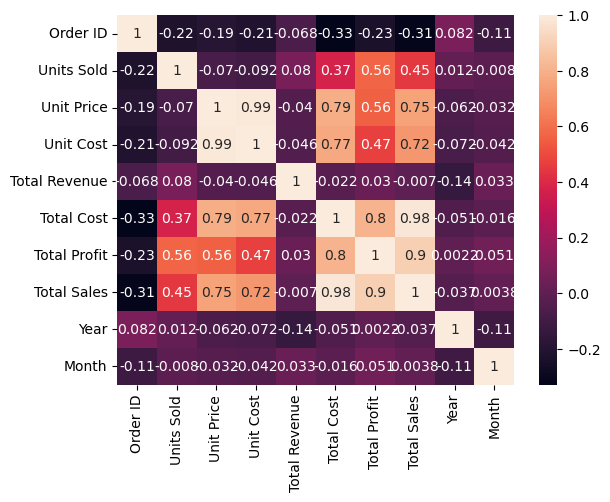

In [88]:
sns.heatmap(df.corr(),annot=True)

### *** From the above heatmap, we can infer that Total Cost is strongly related to Unit Price,Unit Cost and Total Profit.

### *** Units Sold and {Unit Price and Unit Cost} are completely independent. Number of units sold are independent of price charged per unit of a product and same with cost of a unit which is independent of units sold.

### *** Unit Cost, Unit Price and Total Cost are almost completely independent of Total Revenue.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

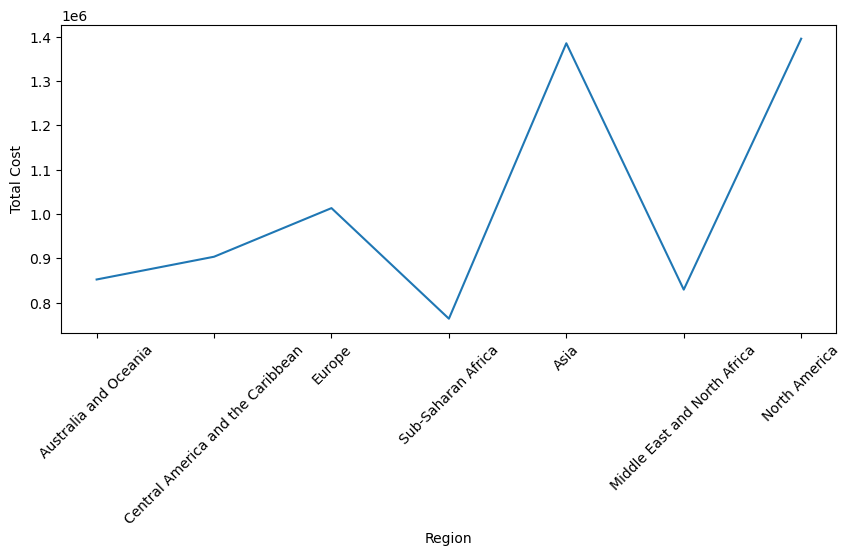

In [89]:
plt.figure(figsize=(10,4))
sns.lineplot(x='Region',y='Total Cost',data=df,ci=None)
plt.xticks(rotation=45)

### *** Products have been much more expensive in Asia and North America in comparison to other continents.

In [90]:
df.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month
0,669165933,2010-05-28,H,2010-06-27,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,4870.26,1582243.50,951410.50,2533654.00,2010,5
1,963881480,2012-08-22,C,2012-09-15,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,435466.90,328376.44,248406.36,576782.80,2012,8
2,341417157,2014-05-02,L,2014-05-08,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,247956.32,933903.84,224598.75,1158502.59,2014,5
3,514321792,2014-06-20,C,2014-07-05,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,2014,6
4,115456712,2013-02-01,L,2013-02-06,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,471336.91,2657347.52,639077.50,3296425.02,2013,2


In [91]:
df['Country'].unique()

array(['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zamb

In [92]:
countries = ['Tuvalu', 'Grenada', 'Russia', 'Sao Tome and Principe', 'Rwanda',
       'Solomon Islands', 'Angola', 'Burkina Faso',
       'Republic of the Congo', 'Senegal', 'Kyrgyzstan', 'Cape Verde',
       'Bangladesh', 'Honduras', 'Mongolia', 'Bulgaria', 'Sri Lanka',
       'Cameroon', 'Turkmenistan', 'East Timor', 'Norway', 'Portugal',
       'New Zealand', 'Moldova ', 'France', 'Kiribati', 'Mali',
       'The Gambia', 'Switzerland', 'South Sudan', 'Australia', 'Myanmar',
       'Djibouti', 'Costa Rica', 'Syria', 'Brunei', 'Niger', 'Azerbaijan',
       'Slovakia', 'Comoros', 'Iceland', 'Macedonia', 'Mauritania',
       'Albania', 'Lesotho', 'Saudi Arabia', 'Sierra Leone',
       "Cote d'Ivoire", 'Fiji', 'Austria', 'United Kingdom', 'San Marino',
       'Libya', 'Haiti', 'Gabon', 'Belize', 'Lithuania', 'Madagascar',
       'Democratic Republic of the Congo', 'Pakistan', 'Mexico',
       'Federated States of Micronesia', 'Laos', 'Monaco', 'Samoa ',
       'Spain', 'Lebanon', 'Iran', 'Zambia', 'Kenya', 'Kuwait',
       'Slovenia', 'Romania', 'Nicaragua', 'Malaysia', 'Mozambique']

In [93]:
df['Country'] = pd.Categorical(df['Country'],categories=countries,ordered=True)

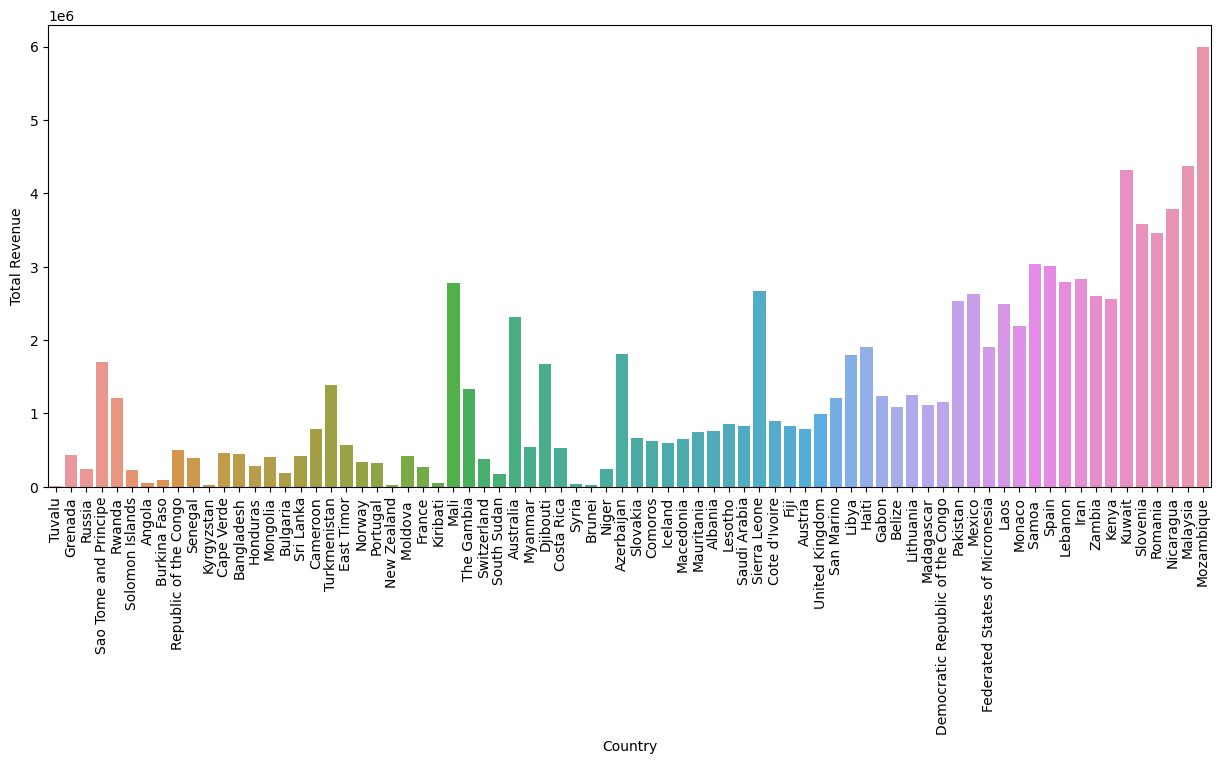

In [94]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Country', y='Total Revenue', data=df, ci=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)

### *** Mozambique is the country where maximum revenue has been generated followed by Malaysia.

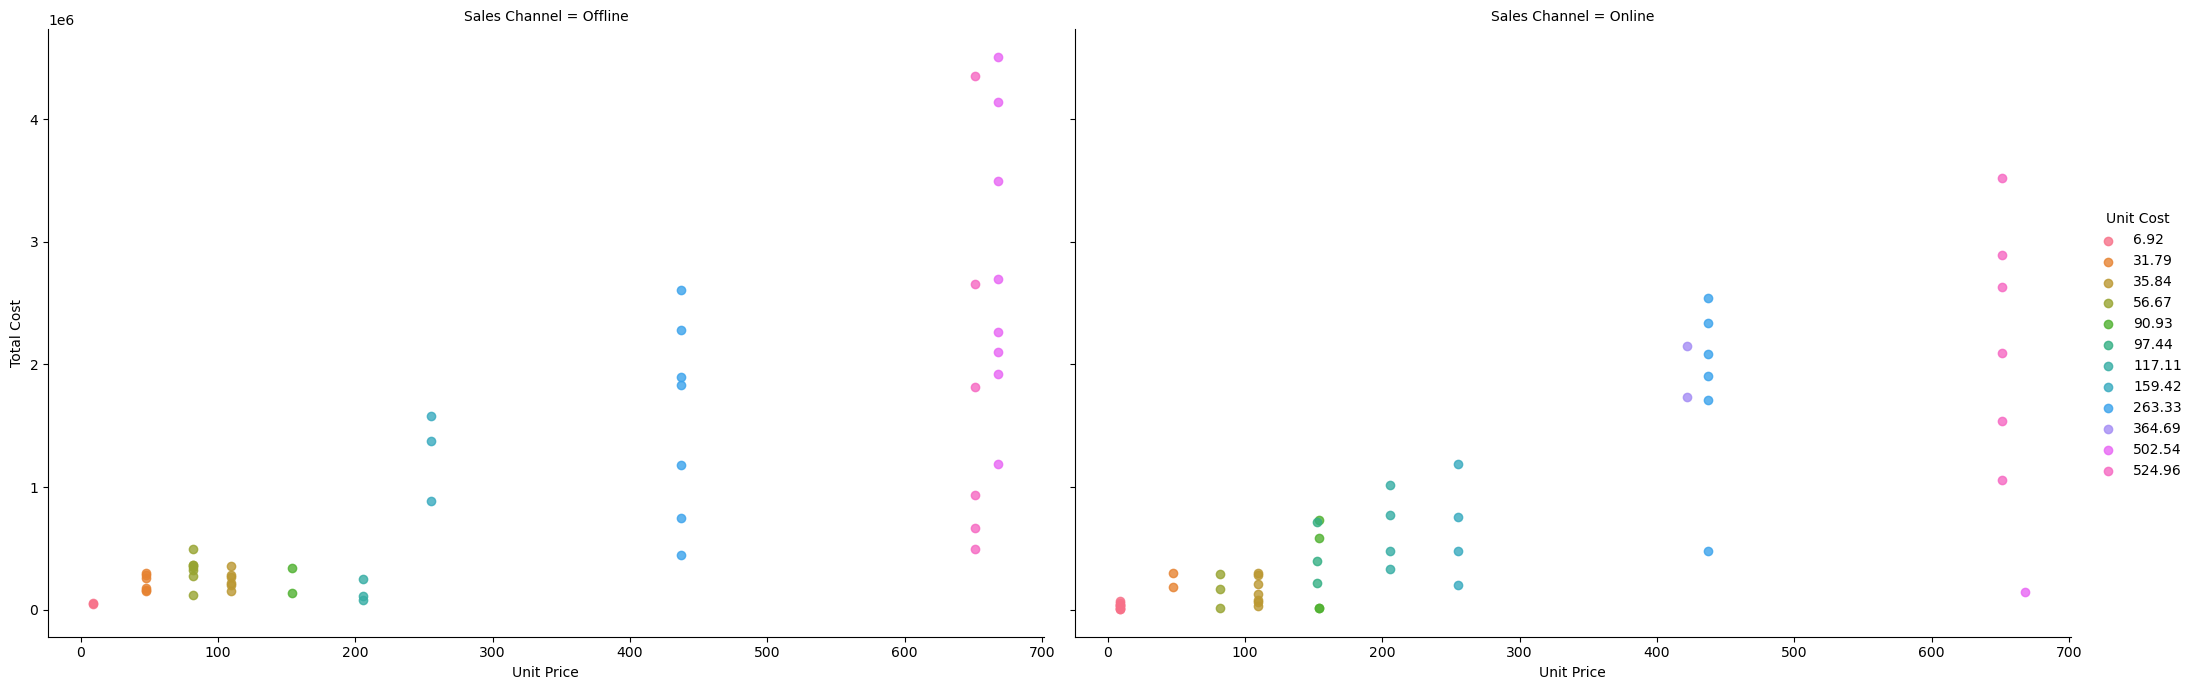

In [95]:
sns.lmplot(x='Unit Price',y='Total Cost',data=df,col='Sales Channel',hue='Unit Cost',aspect=1.5,height=7)

In [96]:
df.sort_values(by='Unit Price')

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month
23,142278373,2014-09-08,H,2014-10-04,Fruits,Australia and Oceania,New Zealand,Online,2187,9.33,6.92,20404.71,15134.04,5270.67,20404.71,2014,9
54,508980977,2013-09-17,H,2013-10-24,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Offline,7637,9.33,6.92,802333.76,52848.04,18405.17,71253.21,2013,9
36,162052476,2011-11-22,L,2011-12-03,Fruits,Middle East and North Africa,Syria,Online,3784,9.33,6.92,35304.72,26185.28,9119.44,35304.72,2011,11
3,514321792,2014-06-20,C,2014-07-05,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,2014,6
96,810711038,2011-11-11,L,2011-12-28,Fruits,Asia,Malaysia,Offline,6267,9.33,6.92,4368316.68,43367.64,15103.47,58471.11,2011,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,886494815,2012-05-26,L,2012-06-09,Household,Sub-Saharan Africa,The Gambia,Offline,2370,668.27,502.54,6279.09,1191019.80,392780.10,1583799.90,2012,5
80,213487374,2012-10-21,L,2012-11-30,Household,Europe,Spain,Offline,4513,668.27,502.54,3015902.51,2267963.02,747939.49,3015902.51,2012,10
58,955357205,2012-01-05,L,2012-02-14,Household,Europe,United Kingdom,Online,282,668.27,502.54,994765.42,141716.28,46735.86,188452.14,2012,1
18,441619336,2010-12-30,L,2011-01-20,Household,Asia,Turkmenistan,Offline,3830,668.27,502.54,524870.06,1924728.20,634745.90,2559474.10,2010,12


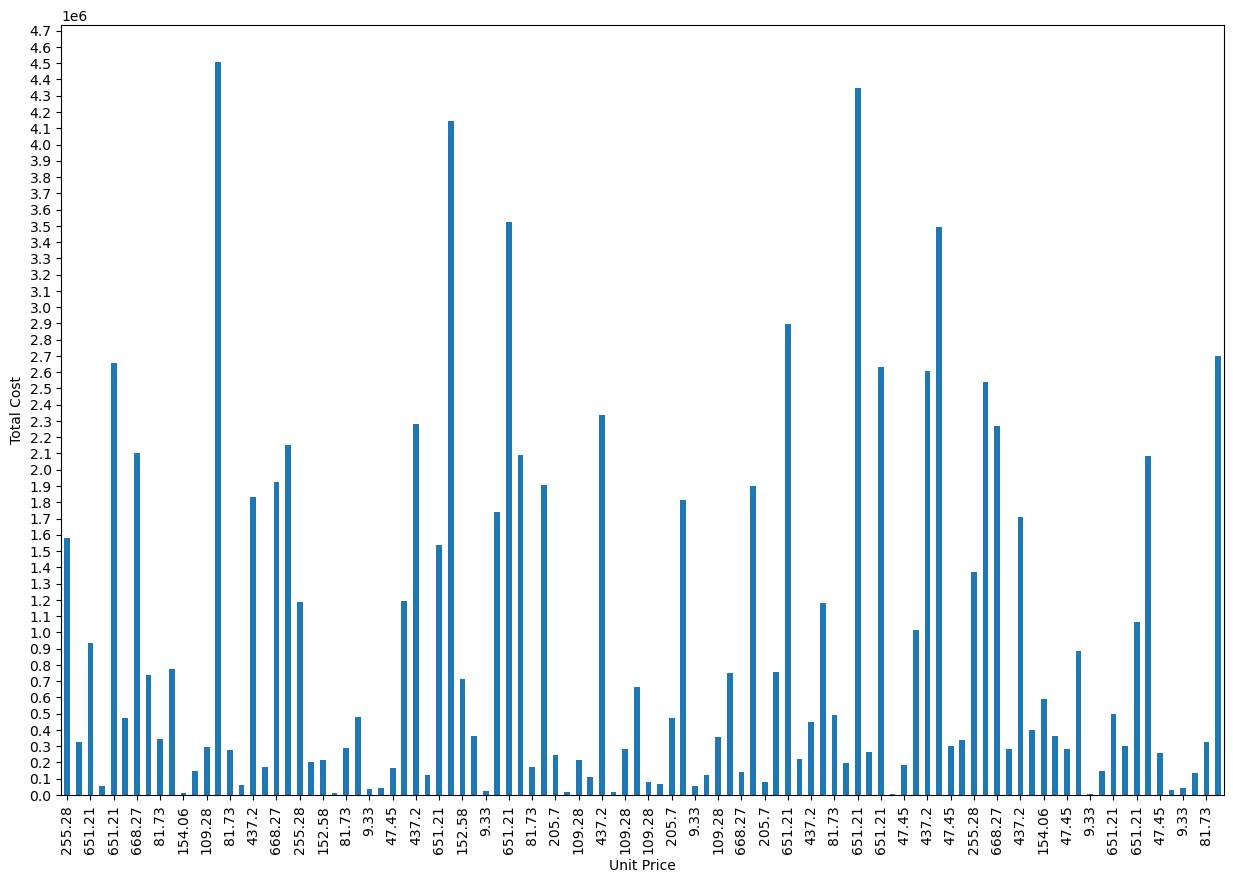

In [97]:
df.plot.bar(x='Unit Price',y='Total Cost',legend=None,figsize=(15,10),rot=0)
plt.ylabel('Total Cost')
plt.xticks(rotation=90)
plt.locator_params(nbins=90)

### *** The above bar plot suggests that higher the value of unit price of a product, more will be the total cost of it.

In [98]:
np.cov(df['Unit Price'],df['Total Cost'])

array([[5.55037038e+04, 2.01205393e+08],
       [2.01205393e+08, 1.17492213e+12]])

In [99]:
np.corrcoef(df['Unit Price'],df['Total Cost'])

array([[1.        , 0.78790543],
       [0.78790543, 1.        ]])

### *** The high value of degree of correlation between 'Unit Price' and 'Total Cost' variables indicates that they are almost directly proportional to each other and highly dependent on each other.

Text(0, 0.5, 'Total Profit')

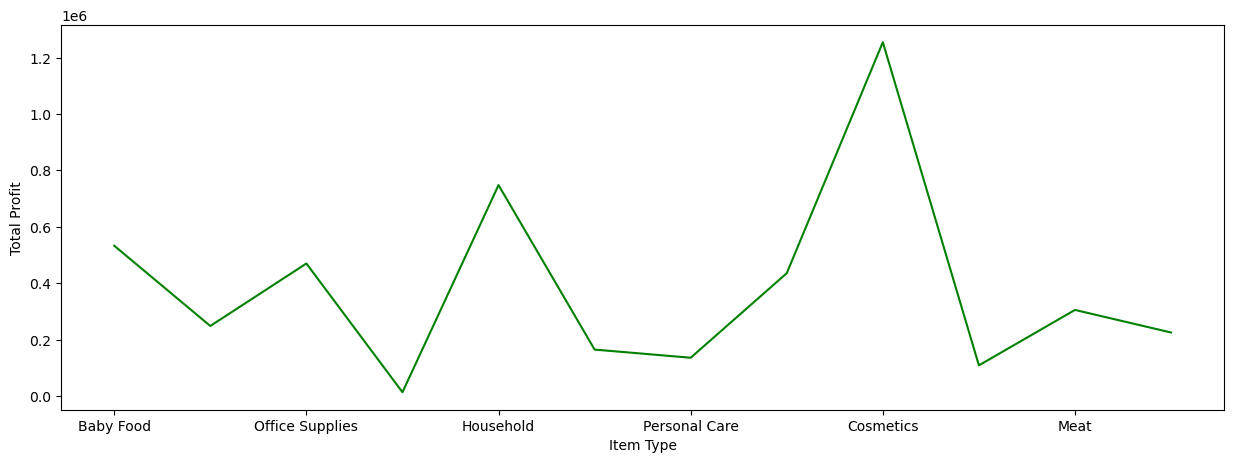

In [100]:
pd.pivot_table(df,index='Item Type',values='Total Profit',aggfunc=np.median).plot(kind='line',color='green',figsize=(15,5),legend=None)
plt.ylabel('Total Profit')

Text(0, 0.5, 'Total Profit')

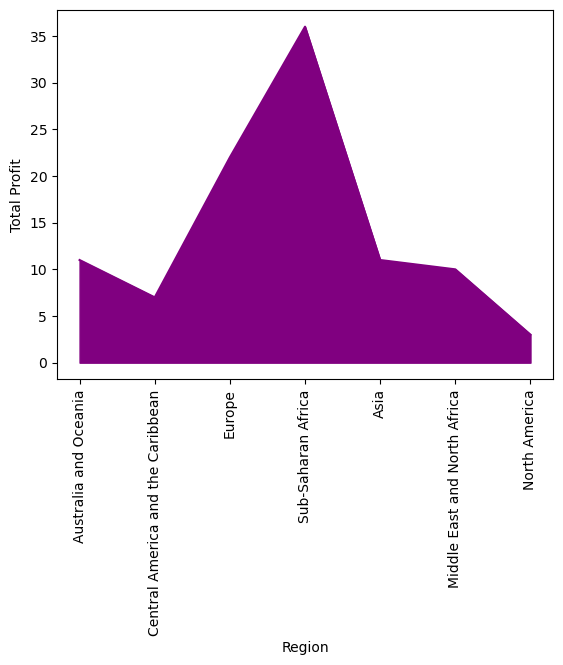

In [101]:
df.groupby('Region')['Total Profit'].count().plot(kind='area',color=['purple','brown','blue','green'])
plt.xticks(rotation=90)
plt.ylabel('Total Profit')

### *** Maximum profit has been generated in the Sub-Saharan African region while minimum profit has been generated in the North American region.

In [102]:
df['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

In [103]:
order_priorities = ['H', 'C', 'L', 'M']

In [104]:
df['Order Priority'] = pd.Categorical(df['Order Priority'],categories=order_priorities,ordered=True)

Text(0, 0.5, 'Total Revenue')

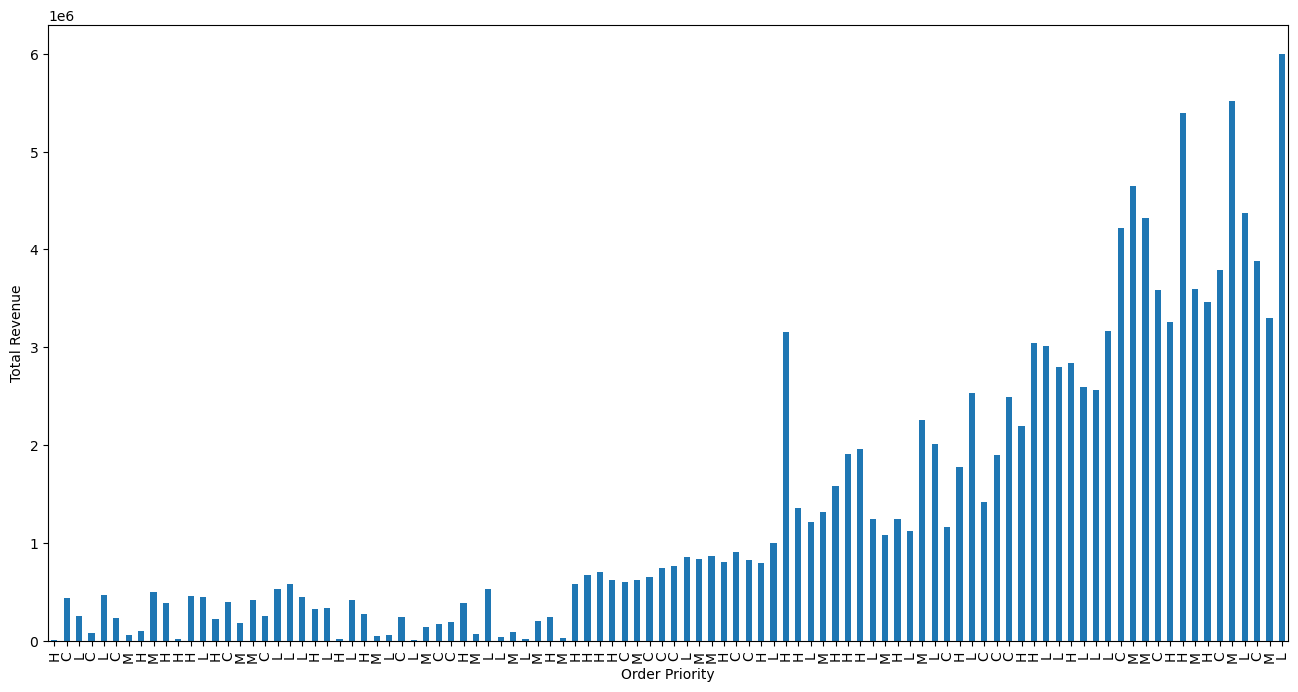

In [105]:
df.plot.bar(x='Order Priority',y='Total Revenue',legend=None,figsize=(16,8))
plt.xticks(rotation=90)
plt.ylabel('Total Revenue')

Text(0, 0.5, 'Total Revenue')

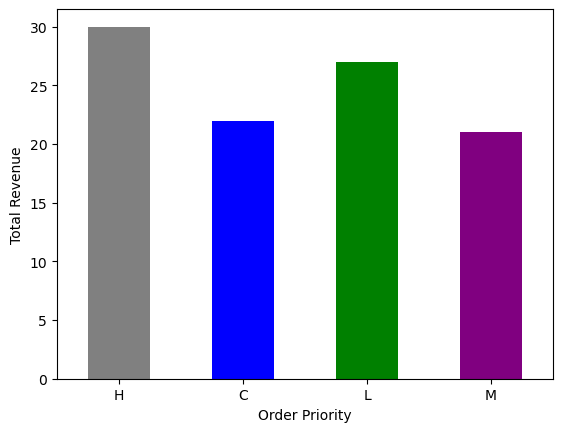

In [106]:
df.groupby('Order Priority')['Total Revenue'].count().plot(kind='bar',color=['grey','blue','green','purple','brown'])
plt.xticks(rotation=0)
plt.ylabel('Total Revenue')

### *** Maximum number of revenues has been generated by the products having order priority 'H' while minimum revenues has been generated by 'M' priority products.

Text(0.5, 1.0, 'Distribution of profit on the basis of order priority')

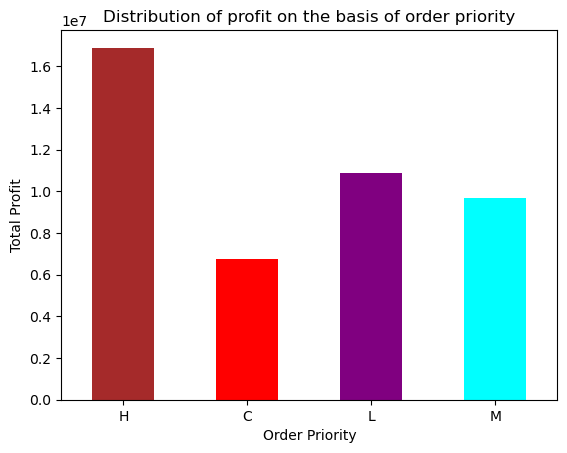

In [107]:
df.groupby('Order Priority')['Total Profit'].sum().plot(kind='bar',color=['brown','red','purple','aqua'])
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.title('Distribution of profit on the basis of order priority')

### *** Maximum profit has been generated by products having order priority 'H' while minimum profit has been obtained in case of 'C' priority product orders.

In [108]:
import joypy

(<Figure size 900x600 with 13 Axes>,
 [<AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>,
  <AxesSubplot:>])

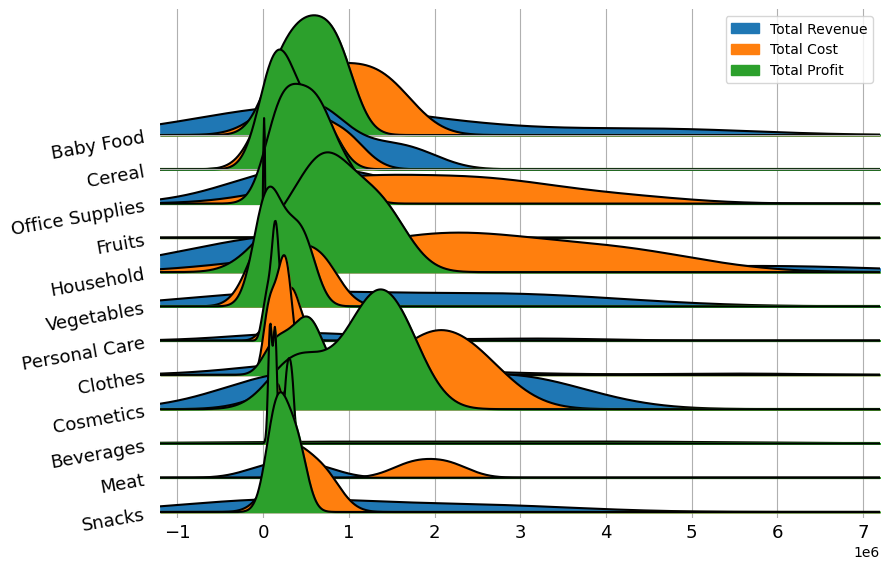

In [109]:
joypy.joyplot(df,column=['Total Revenue','Total Cost','Total Profit'],by='Item Type',figsize=(9,6),xlabelsize=13,ylim='own',ylabelsize=13,grid='both',yrot=10,fill=True,legend=True,overlap=2)

Text(0, 0.5, 'Total Profit')

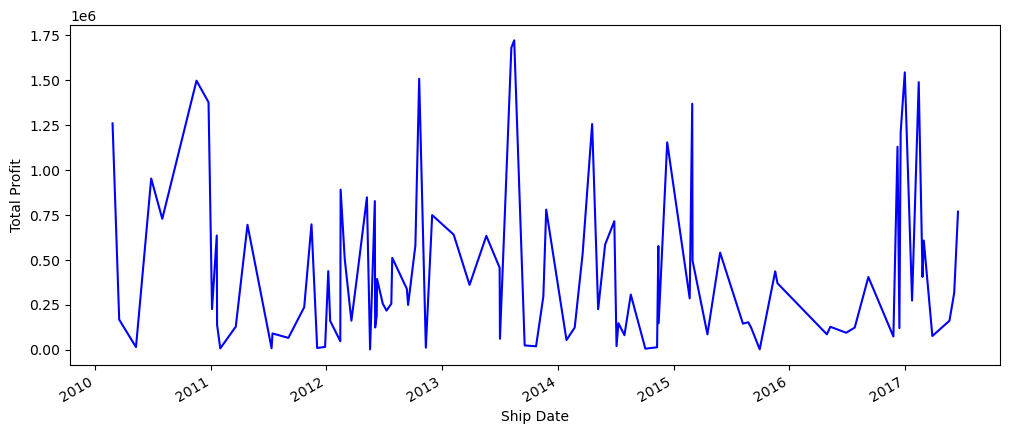

In [110]:
plt.figure(figsize=(12,5))
df.groupby('Ship Date')['Total Profit'].sum().plot(kind='line',color='blue',sort_columns=True)
plt.ylabel('Total Profit')

In [111]:
np.max(df.loc[:,'Total Profit'].iloc[:])

1719922.04

In [112]:
np.set_printoptions = True

In [113]:
pd.DataFrame(df.value_counts())

,,,,,,,,,,,,,,,,,0
Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month,
114606559,2012-06-08,C,2012-06-27,Clothes,Sub-Saharan Africa,Cote d'Ivoire,Online,3482,109.28,35.84,902980.64,124794.88,255718.08,380512.96,2012,6,1
686048400,2010-05-07,L,2010-05-10,Fruits,Sub-Saharan Africa,Mali,Online,5822,9.33,6.92,54319.26,40288.24,14031.02,54319.26,2010,5,1
787399423,2014-10-14,C,2014-11-14,Clothes,Europe,Macedonia,Offline,7842,109.28,35.84,648030.40,281057.28,575916.48,856973.76,2014,10,1
770463311,2015-07-14,M,2015-08-25,Personal Care,Sub-Saharan Africa,Republic of the Congo,Offline,6070,81.73,56.67,496101.10,343986.90,152114.20,496101.10,2015,7,1
759224212,2012-10-06,H,2012-11-10,Vegetables,Europe,Slovakia,Online,171,154.06,90.93,668356.48,15549.03,10795.23,26344.26,2012,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406502997,2013-12-29,C,2014-01-28,Personal Care,Sub-Saharan Africa,South Sudan,Offline,2125,81.73,56.67,173676.25,120423.75,53252.50,173676.25,2013,12,1
385383069,2010-02-02,C,2010-03-18,Clothes,Europe,Albania,Online,2269,109.28,35.84,759202.72,81320.96,166635.36,247956.32,2010,2,1
382392299,2010-02-06,M,2010-02-25,Cosmetics,Middle East and North Africa,Azerbaijan,Online,7234,437.20,263.33,26344.26,1904929.22,1257775.58,3162704.80,2010,2,1


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]), [])

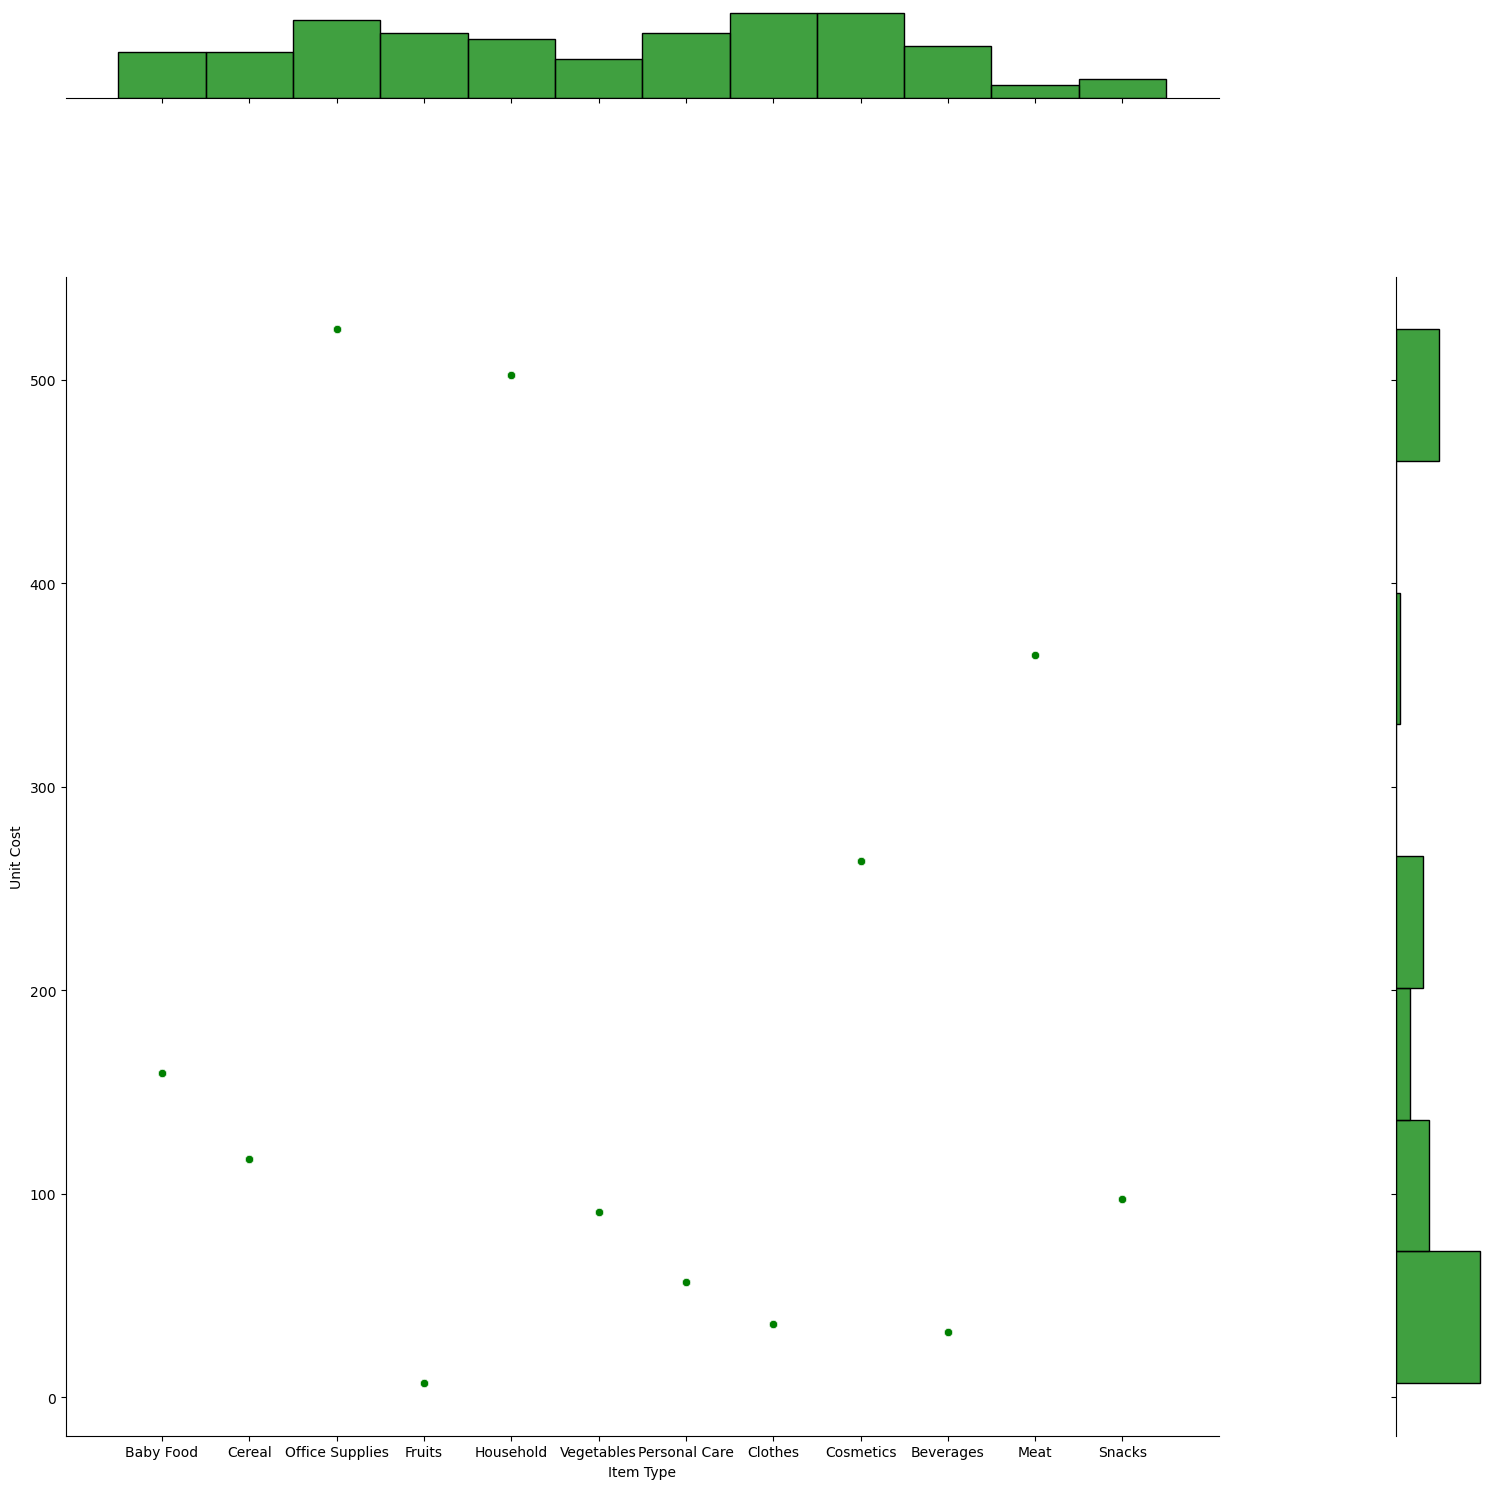

In [114]:
sns.jointplot(x='Item Type',y='Unit Cost',data=df,kind='scatter',color="g",height=15,ratio=5,dropna=True,space=2)
plt.locator_params(nbins=10)
plt.xticks(rotation=90)

### *** Office Supplies have the maximum unit cost while Fruits have minimum unit cost.

In [115]:
np.max(df['Unit Cost'])

524.96

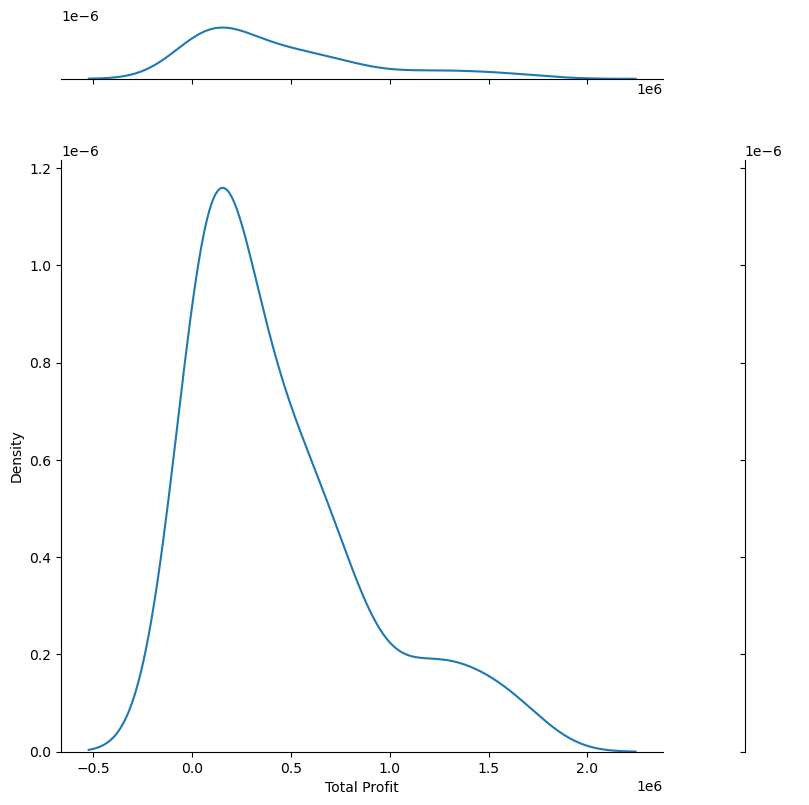

In [116]:
sns.jointplot(x='Total Profit',data=df,height=8,ratio=5,kind='kde',space=1.5)

In [117]:
df['Item Type'].dropna(inplace=True)

In [118]:
labels = df['Item Type'].value_counts().index

In [119]:
sizes = df['Item Type'].value_counts().values
colors = ['grey','blue','red','lime','purple','brown']

Text(0.5, 1.0, 'Distribution of Item Types')

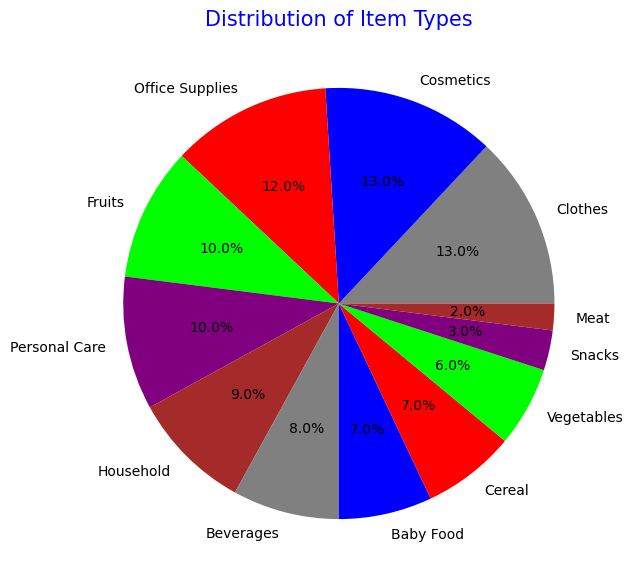

In [120]:
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Distribution of Item Types',fontsize=15,color='blue')

### *** Clothes and cosmetics are the most purchased items while meat and snacks are the least purchased ones.

## >>> LM Plot

In [121]:
df['Country'].nunique()

76

In [122]:
countries_data = pd.DataFrame(df['Country'].unique())
countries_data

,0
0,Tuvalu
1,Grenada
2,Russia
3,Sao Tome and Principe
4,Rwanda
...,...
71,Slovenia
72,Romania
73,Nicaragua
74,Malaysia


In [123]:
countries_data.value_counts()

Tuvalu         1
Fiji           1
Belize         1
Gabon          1
Haiti          1
              ..
France         1
Moldova        1
New Zealand    1
Portugal       1
Mozambique     1
Length: 76, dtype: int64

In [124]:
countries = df['Country'].values.tolist()

In [125]:
countries

['Tuvalu',
 'Grenada',
 'Russia',
 'Sao Tome and Principe',
 'Rwanda',
 'Solomon Islands',
 'Angola',
 'Burkina Faso',
 'Republic of the Congo',
 'Senegal',
 'Kyrgyzstan',
 'Cape Verde',
 'Bangladesh',
 'Honduras',
 'Mongolia',
 'Bulgaria',
 'Sri Lanka',
 'Cameroon',
 'Turkmenistan',
 'East Timor',
 'Norway',
 'Portugal',
 'Honduras',
 'New Zealand',
 'Moldova ',
 'France',
 'Kiribati',
 'Mali',
 'Norway',
 'The Gambia',
 'Switzerland',
 'South Sudan',
 'Australia',
 'Myanmar',
 'Djibouti',
 'Costa Rica',
 'Syria',
 'The Gambia',
 'Brunei',
 'Bulgaria',
 'Niger',
 'Azerbaijan',
 'The Gambia',
 'Slovakia',
 'Myanmar',
 'Comoros',
 'Iceland',
 'Switzerland',
 'Macedonia',
 'Mauritania',
 'Albania',
 'Lesotho',
 'Saudi Arabia',
 'Sierra Leone',
 'Sao Tome and Principe',
 "Cote d'Ivoire",
 'Fiji',
 'Austria',
 'United Kingdom',
 'Djibouti',
 'Australia',
 'San Marino',
 'Cameroon',
 'Libya',
 'Haiti',
 'Rwanda',
 'Gabon',
 'Belize',
 'Lithuania',
 'Madagascar',
 'Turkmenistan',
 'Libya',
 

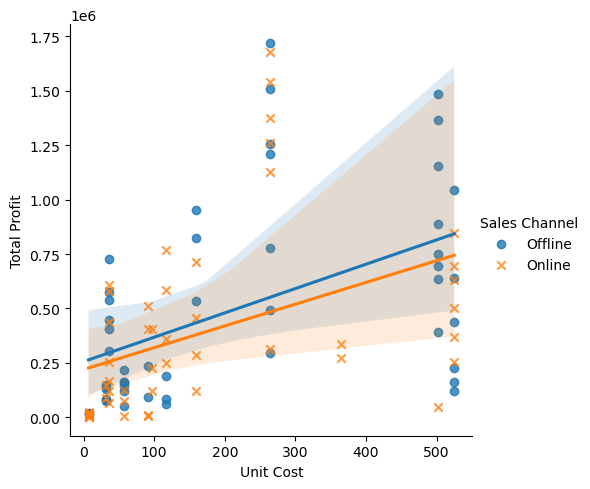

In [126]:
sns.lmplot(x='Unit Cost',y='Total Profit',data=df,height=5,aspect=1,hue='Sales Channel',logx=False,truncate=True,ci=100,y_jitter=2.2,scatter=True,fit_reg=True,markers=['o','x'])

### *** From the above LM plot, we can infer that profit keeps on increasing with increase in unit cost.

## >>> KDE Plot

In [127]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

<AxesSubplot:xlabel='Order Date', ylabel='Units Sold'>

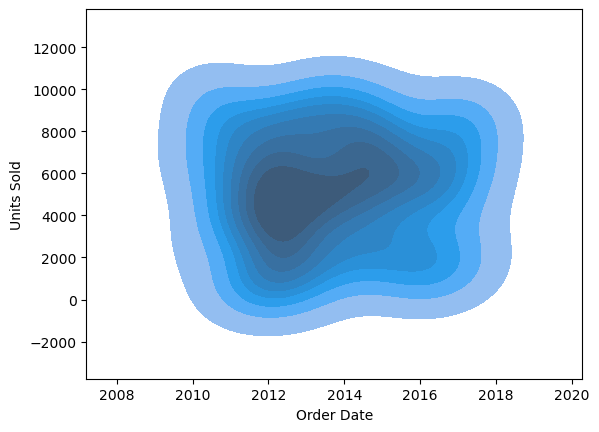

In [128]:
sns.kdeplot(x='Order Date',y='Units Sold',data=df,shade=True,cut=3)

In [129]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

<AxesSubplot:xlabel='Ship Date', ylabel='Total Cost'>

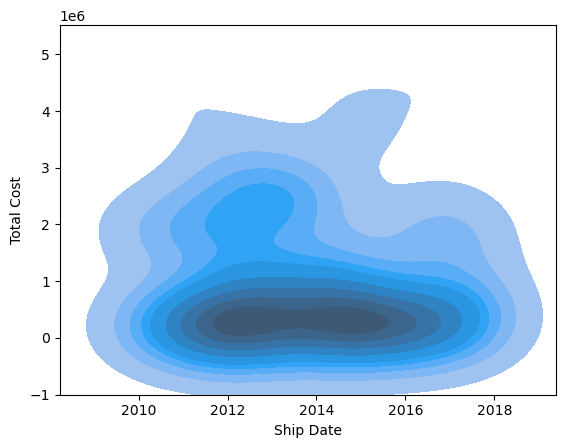

In [130]:
sns.kdeplot(x='Ship Date',y='Total Cost',data=df,shade=True,cut=2)

## >>> Violin Plot

In [131]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)

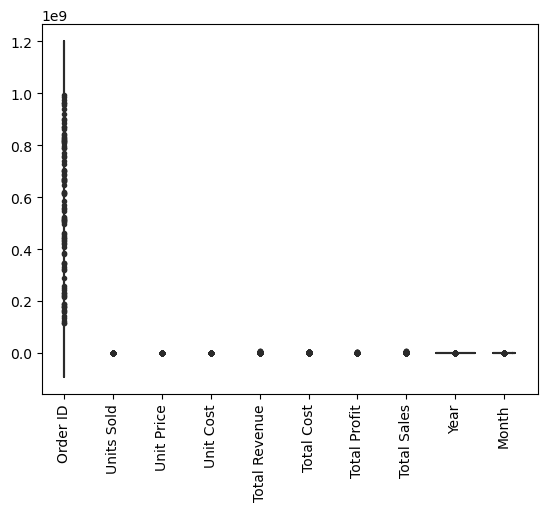

In [132]:
sns.violinplot(data=df,palette=pal,inner="points")
list_a = list(range(12))
plt.xticks(rotation=90)
plt.locator_params(axis='y',nbins=10)
plt.locator_params(axis='x',nbins=10)

In [133]:
df.head()

,Order ID,Order Date,Order Priority,Ship Date,Item Type,Region,Country,Sales Channel,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Total Sales,Year,Month
0,669165933,2010-05-28,H,2010-06-27,Baby Food,Australia and Oceania,Tuvalu,Offline,9925,255.28,159.42,4870.26,1582243.50,951410.50,2533654.00,2010,5
1,963881480,2012-08-22,C,2012-09-15,Cereal,Central America and the Caribbean,Grenada,Online,2804,205.70,117.11,435466.90,328376.44,248406.36,576782.80,2012,8
2,341417157,2014-05-02,L,2014-05-08,Office Supplies,Europe,Russia,Offline,1779,651.21,524.96,247956.32,933903.84,224598.75,1158502.59,2014,5
3,514321792,2014-06-20,C,2014-07-05,Fruits,Sub-Saharan Africa,Sao Tome and Principe,Online,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,2014,6
4,115456712,2013-02-01,L,2013-02-06,Office Supplies,Sub-Saharan Africa,Rwanda,Offline,5062,651.21,524.96,471336.91,2657347.52,639077.50,3296425.02,2013,2


Text(0, 0.5, 'Total Profit')

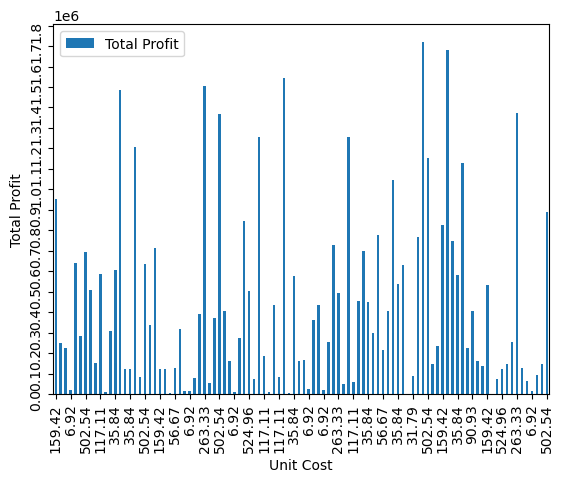

In [134]:
df.plot(x='Unit Cost', y='Total Profit', kind='bar')
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=90,fontsize=10)
plt.locator_params(axis='x',nbins=40)
plt.locator_params(axis='y',nbins=30)
plt.ylabel('Total Profit')

Text(0.5, 1.0, 'Revenue generated per Order Date')

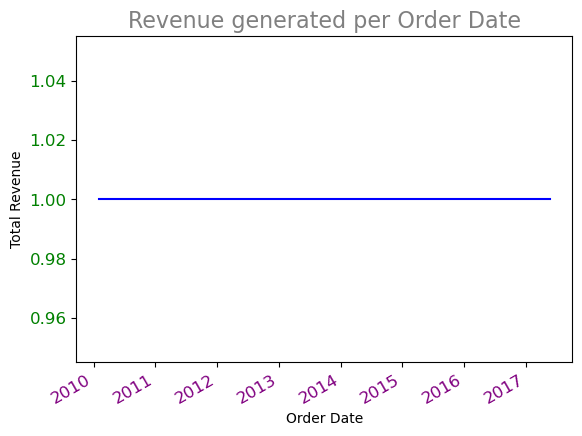

In [135]:
pd.pivot_table(index='Order Date',values='Total Revenue',data=df,aggfunc='count').plot(kind='line',color='blue',legend=False)
plt.ylabel('Total Revenue')
plt.yticks(fontsize=12,color='green')
plt.xticks(fontsize=12,color='purple')
plt.title('Revenue generated per Order Date',fontsize=16,color='grey')

### *** Total revenue remains constant for every year from 2010 to 2017.